In [1]:
import numpy as np
import pandas as pd
import string
#for visualisation
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
#https://pub.towardsai.net/natural-language-processing-nlp-with-python-tutorial-for-beginners-1f54e610a1a0
#https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/
#https://www.actuia.com/contribution/victorbigand/tutoriel-tal-pour-les-debutants-classification-de-texte/
#https://www.datacamp.com/community/tutorials/wordcloud-python
#(wordcloud)
#https://thinkinfi.com/automatic-keyword-extraction-using-rake-in-python/
#(extraction mot frequent)
#https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5
#https://sites.google.com/view/aide-python/applications/text-mining-en-langage-python
#texte python


# for NLP
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
pip install opencv-python==4.5.1.48

     |████████████████████████████████| 50.4MB 50kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


In [2]:

import cv2
cv2.__version__

'4.1.2'

In [ ]:
 #pip install python-rake==1.4.4 

In [ ]:
#import RAKE

# Importation table de travail

In [3]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/P6 Classifiez des biens /flipkart_com-ecommerce_sample_1050.csv')

In [4]:
data.head()

uniq_id  ...                             product_specifications
0  55b85ea15a1536d46b7190ad6fff8ce7  ...  {"product_specification"=>[{"key"=>"Brand", "v...
1  7b72c92c2f6c40268628ec5f14c6d590  ...  {"product_specification"=>[{"key"=>"Machine Wa...
2  64d5d4a258243731dc7bbb1eef49ad74  ...  {"product_specification"=>[{"key"=>"Material",...
3  d4684dcdc759dd9cdf41504698d737d8  ...  {"product_specification"=>[{"key"=>"Brand", "v...
4  6325b6870c54cd47be6ebfbffa620ec7  ...  {"product_specification"=>[{"key"=>"Machine Wa...

[5 rows x 15 columns]

In [5]:
data.shape

(1050, 15)

In [6]:
data.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [7]:
data.isna().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

In [8]:
data['product_category_tree'].head()

0    ["Home Furnishing >> Curtains & Accessories >>...
1    ["Baby Care >> Baby Bath & Skin >> Baby Bath T...
2    ["Baby Care >> Baby Bath & Skin >> Baby Bath T...
3    ["Home Furnishing >> Bed Linen >> Bedsheets >>...
4    ["Home Furnishing >> Bed Linen >> Bedsheets >>...
Name: product_category_tree, dtype: object

Nous voyons que la colonne catégorie a une catégorie principale et des sous catégories, nous allons détailler les différents informations en vue de connaitre le nombre de catégories, nous allons prendre la catégorie principale et les deux premiéres sous catégories.

In [9]:
data['product_category_tree'][1]

'["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]'

#Nettoyage colonne categories

In [10]:
data['product_category_tree'][1].split('["')
#[1].split('"]')[0]

['',
 'Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]']

In [ ]:
data['product_category_tree'][1].split('["')[1]

'Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]'

In [ ]:
data['product_category_tree'][1].split('["')[1].split('"]')

['Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y...',
 '']

In [ ]:
data['product_category_tree'][1].split('["')[1].split('"]')[0]

'Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y...'

Faisons une fonction qui permet de faire toutes ces transformations, qui permet de prendre les trois premiers éléments de la liste 

In [11]:
def split_categories(category, level):
    '''FOnction qui affiche les '''
    category = category.split('["')[1].split('"]')[0]
    cat = category.split(' >> ')
    if(len(cat)) < 3:
        cat = [cat[0], cat[1], 'None']
        if(len(cat))<2:
            cat = [cat[0], 'None', 'None']
    return cat[level]

## Fonction de transformation

In [12]:
#on prend la premiere categorie de la liste 
def split_categories_1(category):
    return split_categories(category,0)
#on prend la deuxiéme catégore de la liste 
def split_categories_2(category):
    return split_categories(category,1)
#on prend la troisiéme catégorie de la liste 
def split_categories_3(category):
    return split_categories(category,2)
#on va rajouter ces trois colonnes sur notre table data
#en utilisant comme colonne product category tree
#et on va garder la colonne category tree pour la comparaison 

In [13]:
def detail_categories(dataframe):
    dataframe['cat_lvl_1'] = dataframe['product_category_tree'].apply(split_categories_1)
    dataframe['cat_lvl_2'] = dataframe['product_category_tree'].apply(split_categories_2)
    dataframe['cat_lvl_3'] = dataframe['product_category_tree'].apply(split_categories_3)
    return dataframe

In [14]:
data=detail_categories(data)
#on prend la colonne categories tree on prend les trois premieres éléments
#remplis par le vendeur 

In [ ]:
data.columns
#creation des colonnes categorie 1, 2 et 3


Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications', 'cat_lvl_1',
       'cat_lvl_2', 'cat_lvl_3'],
      dtype='object')

In [ ]:
data.isna().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
cat_lvl_1                    0
cat_lvl_2                    0
cat_lvl_3                    0
dtype: int64

## Exploration categorie 

In [ ]:
data['cat_lvl_1'].head()

0    Home Furnishing
1          Baby Care
2          Baby Care
3    Home Furnishing
4    Home Furnishing
Name: cat_lvl_1, dtype: object

In [ ]:
data['cat_lvl_1'].value_counts()

Watches                       150
Baby Care                     150
Home Furnishing               150
Computers                     150
Home Decor & Festive Needs    150
Kitchen & Dining              150
Beauty and Personal Care      150
Name: cat_lvl_1, dtype: int64

Nous voyons qu'en prenant la categorie principale nous avons 7 catégories dans notre base nous allons travailler pour la suite avec cette colonne  

In [ ]:
df=pd.DataFrame({'Modalités':data['cat_lvl_1'].value_counts().index,'Frequence':data['cat_lvl_1'].value_counts().values})

In [ ]:
df['Traduction']=['Soins pour bebe','Cuisine et sallea manger','montres','ordinateurs',\
                  'Beauté et soins','Aménagement maison','Décoration']

In [ ]:
df

Modalités  Frequence                Traduction
0                     Watches        150           Soins pour bebe
1             Home Furnishing        150  Cuisine et sallea manger
2                   Computers        150                   montres
3  Home Decor & Festive Needs        150               ordinateurs
4            Kitchen & Dining        150           Beauté et soins
5                   Baby Care        150        Aménagement maison
6    Beauty and Personal Care        150                Décoration

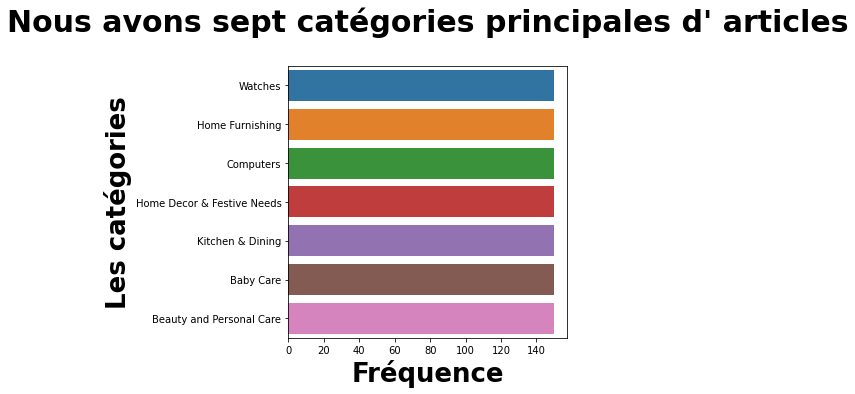

In [ ]:

plt.figure(figsize =(5,5))
sns.barplot(y='Modalités',x='Frequence',data=df)
#plt.title('les différents catégories de notre base sont équilibrées')
plt.title('Nous avons sept catégories principales d\' articles', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('Fréquence', fontsize = 26, fontweight = 'bold')
plt.ylabel('Les catégories', fontsize = 26, fontweight = 'bold')
#plt.legend() 
#plt.legend(prop={'size': 14})
plt.show()
#plt.show()

In [ ]:
pd.set_option('display.max_row',62)
data['cat_lvl_2'].value_counts()
#Nous avons 62 catégories 
#c'est plus détaille que les categories de la colonne cat_lvl1

Wrist Watches                      149
Laptop Accessories                  87
Infant Wear                         84
Coffee Mugs                         74
Showpieces                          71
Fragrances                          65
Bed Linen                           65
Network Components                  49
Cookware                            27
Table Decor & Handicrafts           27
Combos and Kits                     24
Wall Decor & Clocks                 22
Bath Linen                          21
Curtains & Accessories              19
Makeup                              18
Baby Bedding                        15
Baby & Kids Gifts                   15
Body and Skin Care                  15
Kitchen & Dining Linen              14
Baby Bath & Skin                    14
Kitchen Tools                       14
Decorative Lighting & Lamps         14
Cushions, Pillows & Covers          13
Containers & Bottles                13
Hair Care                            9
Feeding & Nursing        

In [ ]:
pd.set_option('display.max_row',242)
data['cat_lvl_3'].value_counts()
#cette colonne donne encore plus de détails que les deux autres
#nous avons 242 catégories de produits 

Deodorants                                             65
Blankets, Quilts & Dohars                              57
Routers                                                49
Baby Girls' Clothes                                    49
USB Gadgets                                            38
Baby Boys' Clothes                                     35
Ethnic                                                 34
Prithish Coffee Mugs                                   26
Pots & Pans                                            24
Showpieces                                             23
Maxima Wrist Watches                                   23
Rockmantra Coffee Mugs                                 22
Batteries                                              22
Sonata Wrist Watches                                   19
Curtains                                               19
Towels                                                 19
Printland Coffee Mugs                                  13
Kitchen Implem

# Colonne desciption

In [ ]:
#Nous allons travailler sur cette colonne en faisant les différents types 
#de nettoyage pour le traitement des données texte 
##https://www.actuia.com/contribution/victorbigand/tutoriel-tal-pour-les-debutants-classification-de-texte/
#https://towardsdatascience.com/natural-language-processing-nlp-for-machine-learning-d44498845d5b
data['description'].head()

0    Key Features of Elegance Polyester Multicolor ...
1    Specifications of Sathiyas Cotton Bath Towel (...
2    Key Features of Eurospa Cotton Terry Face Towe...
3    Key Features of SANTOSH ROYAL FASHION Cotton P...
4    Key Features of Jaipur Print Cotton Floral Kin...
Name: description, dtype: object

In [15]:
data['description'].sample(5)
#on prend au hasard 5 lignes 

259    Buy Nirlon Kadhai 3 L for Rs.785 online. Nirlo...
244    Bergner Kadhai NA L (Aluminium, Non-stick)\r\n...
106    Buy Bestway 1.47m x 1.47m x 1.22m/Play With Su...
984    Buy Art Godaam Colored figure Showpiece  -  50...
826    Timex TI000I70600 Analog Watch  - For Men - Bu...
Name: description, dtype: object

On va utiliser le package NLTK qui contient toutes les fonctions pour le traitement du NLP

In [16]:
#https://www.nltk.org/data.html
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
len(data['description'])

1050

Nous allons effectuer les différents nettoyages de notre texte, la ponctuation, la normalisation, la lemmatisation ou racinisation tokennisation et stop words
puis nous allons représenter notre corpus en features. On pouvait utiliser la méthode des expressions réguliéres pour supprimer les ponctuations

## Fonction pour le nombre mots 

In [18]:
def taille_mot(base,colonne):
  corpus=base[colonne]
  words_dico=dict()
  import re
  #importation des expressions réguliéres

  expr = re.compile("\W+",re.U) # Expression régulière de segmentation sur les espaces
  for text in corpus: # Pour chaque commentaire du corpus
    text = str(text)
    text = expr.split(text)
    for word in set(text): # Récupération de chaque nouveau mot
      if word not in words_dico:
        words_dico[word]=1
      else: 
          # Pour chaque mot déjà listé : ajouter 1 si on le retrouve
            words_dico[word]=words_dico[word]+1

  return len(words_dico)



In [19]:
data['description'].shape

(1050,)

In [20]:
taille_debut=taille_mot(data,'description')#7671
print(taille_debut)

7671


## Suppression Ponctuation et chiffres 

In [21]:
import string
#https://docs.python.org/3/library/string.html

In [22]:
string.punctuation
#on va supprimer tous ces caractéres spéciaux qui ne donnent aucune information
#pour notre compteur de mots 

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
# fonction qui enleve toutes les ponctuations 
#https://www.w3schools.com/python/ref_string_join.asp
myTuple = ("John", "Peter", "Vicky")

x = "#".join(myTuple)
print(x)

John#Peter#Vicky


In [25]:
def suppression_ponctuation(text):
  text_nopunc="".join([char for char in text if char not in string.punctuation])
  return text_nopunc

In [26]:
data['description'][0]

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

In [27]:
suppression_ponctuation(data['description'][0])
#on voit que notre fonction fonctionne bien 

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral CurtainElegance Polyester Multicolor Abstract Eyelet Door Curtain 213 cm in Height Pack of 2 Price Rs 899 This curtain enhances the look of the interiorsThis curtain is made from 100 high quality polyester fabricIt features an eyelet style stitch with Metal RingIt makes the room environment romantic and lovingThis curtain is ant wrinkle and anti shrinkage and have elegant apparanceGive your home a bright and modernistic appeal with these designs The surreal attention is sure to steal hearts These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening you create the most special moments of joyous beauty given by the soothing prints Bring home the elegant curtain that softly filters light in your room so that you get the right am

In [28]:
data['description_nopunc']=data['description'].apply(lambda x: suppression_ponctuation(x))

In [29]:
taille_filtre1=taille_mot(data,'description_nopunc')#8212
print(taille_filtre1)

8212


In [30]:
data[['description','description_nopunc']].head(6)

description                                 description_nopunc
0  Key Features of Elegance Polyester Multicolor ...  Key Features of Elegance Polyester Multicolor ...
1  Specifications of Sathiyas Cotton Bath Towel (...  Specifications of Sathiyas Cotton Bath Towel 3...
2  Key Features of Eurospa Cotton Terry Face Towe...  Key Features of Eurospa Cotton Terry Face Towe...
3  Key Features of SANTOSH ROYAL FASHION Cotton P...  Key Features of SANTOSH ROYAL FASHION Cotton P...
4  Key Features of Jaipur Print Cotton Floral Kin...  Key Features of Jaipur Print Cotton Floral Kin...
5  Maserati Time R8851116001 Analog Watch  - For ...  Maserati Time R8851116001 Analog Watch   For B...

## Suppression des chiffres dans le corpus

In [31]:
# on va remplacer tous les chiffres qu'on trouve par un espace
def remplace(string):
  string.replace('[0-9]','')
  return string
  

In [32]:
import nltk
nltk.download('punkt')
#https://www.debuggex.com/cheatsheet/regex/python
#https://www.kite.com/python/docs/nltk.RegexpTokenizer
def Harmonisation(text):
  tokenizer = nltk.RegexpTokenizer(r'\w+')
  #tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
  #il prend en compte le caractere d'un mot 1 ou plus 
  #echappe un caractere special
  #retourne un tableau divisé avec les expressions regulieres 
  tokens=tokenizer.tokenize(text)
  return tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#data['description'].apply(lambda x : Harmonisation(x))

les expressions réguliéres sont appelés regex. la ponctuation est conservée ccomme étant un token, on va les supprimer

In [ ]:
#data['description_nopunc'].apply(remplace)

In [33]:
data['description_nodg']=data['description_nopunc'].str.replace('[0-9]','')

In [34]:
taille_filtre2=taille_mot(data,'description_nodg') #7243
print(taille_filtre2)

7243


In [35]:
data[['description','description_nopunc','description_nodg']].head(6)

description  ...                                   description_nodg
0  Key Features of Elegance Polyester Multicolor ...  ...  Key Features of Elegance Polyester Multicolor ...
1  Specifications of Sathiyas Cotton Bath Towel (...  ...  Specifications of Sathiyas Cotton Bath Towel  ...
2  Key Features of Eurospa Cotton Terry Face Towe...  ...  Key Features of Eurospa Cotton Terry Face Towe...
3  Key Features of SANTOSH ROYAL FASHION Cotton P...  ...  Key Features of SANTOSH ROYAL FASHION Cotton P...
4  Key Features of Jaipur Print Cotton Floral Kin...  ...  Key Features of Jaipur Print Cotton Floral Kin...
5  Maserati Time R8851116001 Analog Watch  - For ...  ...  Maserati Time R Analog Watch   For Boys  Buy M...

[6 rows x 3 columns]

## Normalisation et Tokennisation

Nous allons faire la normalisation c'est à dire on va tout mettre en minuscule et faire la tokennisation c'est à dire séparer les mots 

In [36]:
import nltk
nltk.download('punkt')
def Tokennisationetnorm(text):
  tokens=nltk.word_tokenize(text.lower())
  #tokens=nltk.word_tokenize(text)
  return tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [37]:
data['description_token']=data['description_nodg'].apply(lambda x : Tokennisationetnorm(x))

In [38]:
data[['description','description_nodg','description_token']].head()

description  ...                                  description_token
0  Key Features of Elegance Polyester Multicolor ...  ...  [key, features, of, elegance, polyester, multi...
1  Specifications of Sathiyas Cotton Bath Towel (...  ...  [specifications, of, sathiyas, cotton, bath, t...
2  Key Features of Eurospa Cotton Terry Face Towe...  ...  [key, features, of, eurospa, cotton, terry, fa...
3  Key Features of SANTOSH ROYAL FASHION Cotton P...  ...  [key, features, of, santosh, royal, fashion, c...
4  Key Features of Jaipur Print Cotton Floral Kin...  ...  [key, features, of, jaipur, print, cotton, flo...

[5 rows x 3 columns]

In [39]:
taille_filtre3=taille_mot(data,'description_token')
print(taille_filtre3)

5674


## Suppression des stops words

On va supprimer les mots fréquents qui n'apportent pas de valeur informative

In [40]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [41]:
import nltk
stopword=nltk.corpus.stopwords.words('english')

In [42]:
stopword

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [43]:
import nltk
stopword=nltk.corpus.stopwords.words('english')
def suppression_word(text):
  text=[word for word in text if word not in stopword]
  return text

In [44]:
data['description_stop']=data['description_token'].apply(lambda x : suppression_word(x))

In [45]:
taille_filtre4=taille_mot(data,'description_stop')
print(taille_filtre4)

5559


In [46]:
data[['description','description_stop']]

description                                   description_stop
0     Key Features of Elegance Polyester Multicolor ...  [key, features, elegance, polyester, multicolo...
1     Specifications of Sathiyas Cotton Bath Towel (...  [specifications, sathiyas, cotton, bath, towel...
2     Key Features of Eurospa Cotton Terry Face Towe...  [key, features, eurospa, cotton, terry, face, ...
3     Key Features of SANTOSH ROYAL FASHION Cotton P...  [key, features, santosh, royal, fashion, cotto...
4     Key Features of Jaipur Print Cotton Floral Kin...  [key, features, jaipur, print, cotton, floral,...
...                                                 ...                                                ...
1045  Oren Empower Extra Large Self Adhesive Sticker...  [oren, empower, extra, large, self, adhesive, ...
1046  Wallmantra Large Vinyl Sticker Sticker (Pack o...  [wallmantra, large, vinyl, sticker, sticker, p...
1047  Buy Uberlyfe Extra Large Pigmented Polyvinyl F...  [buy, uberlyfe, extra, large, pigmented, polyv...
1048  Buy Wallmantra Medium Vinyl Sticker Sticker fo...  [buy, wallmantra, medium, vinyl, sticker, stic...
1049  Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...  [buy, uberlyfe, large, vinyl, sticker, rs, onl...

[1050 rows x 2 columns]

In [47]:
data['description_stop'][2]

['key',
 'features',
 'eurospa',
 'cotton',
 'terry',
 'face',
 'towel',
 'set',
 'size',
 'small',
 'height',
 'inch',
 'gsm',
 'eurospa',
 'cotton',
 'terry',
 'face',
 'towel',
 'set',
 'piece',
 'face',
 'towel',
 'set',
 'assorted',
 'price',
 'rs',
 'eurospa',
 'brings',
 'exclusively',
 'designed',
 'soft',
 'cotton',
 'towels',
 'export',
 'quality',
 'products',
 'soft',
 'texture',
 'takes',
 'care',
 'skin',
 'gives',
 'enriched',
 'feeling',
 'deserve',
 'eurospa',
 'exporting',
 'bath',
 'towels',
 'lot',
 'renowned',
 'brands',
 'last',
 'years',
 'famous',
 'fine',
 'prints',
 'absorbency',
 'softness',
 'durability',
 'note',
 'product',
 'cotton',
 'susceptible',
 'shrinkage',
 'product',
 'color',
 'may',
 'vary',
 'picture',
 'size',
 'may',
 'vary',
 '±',
 'wash',
 'care',
 'wash',
 'cold',
 'water',
 'iron',
 'bleach',
 'flat',
 'dry',
 'wash',
 'first',
 'use',
 'size',
 'face',
 'towel',
 'cms',
 'x',
 'cmsspecifications',
 'eurospa',
 'cotton',
 'terry',
 'face'

## Racinisation (Stemming)

Le processus de « lemmatisation » consiste à représenter les mots (ou « lemmes » 😉) sous leur forme canonique.Il existe un autre processus qui exerce une fonction similaire qui s'appelle la racinisation(ou stemming en anglais). Cela consiste à ne conserver que la racine des mots étudiés. L'idée étant de supprimer les suffixes, préfixes et autres des mots afin de ne conserver que leur origine

In [48]:
from nltk.stem.snowball import EnglishStemmer
stemm=EnglishStemmer()
def stem_word(text):
  stem_text=[stemm.stem(word)for word in text] 
  return stem_text

In [49]:
data['description_stem']=data['description_stop'].apply(lambda x : stem_word(x))

In [50]:
data[['description','description_stem']]

description                                   description_stem
0     Key Features of Elegance Polyester Multicolor ...  [key, featur, eleg, polyest, multicolor, abstr...
1     Specifications of Sathiyas Cotton Bath Towel (...  [specif, sathiya, cotton, bath, towel, bath, t...
2     Key Features of Eurospa Cotton Terry Face Towe...  [key, featur, eurospa, cotton, terri, face, to...
3     Key Features of SANTOSH ROYAL FASHION Cotton P...  [key, featur, santosh, royal, fashion, cotton,...
4     Key Features of Jaipur Print Cotton Floral Kin...  [key, featur, jaipur, print, cotton, floral, k...
...                                                 ...                                                ...
1045  Oren Empower Extra Large Self Adhesive Sticker...  [oren, empow, extra, larg, self, adhes, sticke...
1046  Wallmantra Large Vinyl Sticker Sticker (Pack o...  [wallmantra, larg, vinyl, sticker, sticker, pa...
1047  Buy Uberlyfe Extra Large Pigmented Polyvinyl F...  [buy, uberlyf, extra, larg, pigment, polyvinyl...
1048  Buy Wallmantra Medium Vinyl Sticker Sticker fo...  [buy, wallmantra, medium, vinyl, sticker, stic...
1049  Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...  [buy, uberlyf, larg, vinyl, sticker, rs, onlin...

[1050 rows x 2 columns]

In [51]:
taille_mot(data,'description_stem')

4575

In [52]:
data['description_stem'][2]

['key',
 'featur',
 'eurospa',
 'cotton',
 'terri',
 'face',
 'towel',
 'set',
 'size',
 'small',
 'height',
 'inch',
 'gsm',
 'eurospa',
 'cotton',
 'terri',
 'face',
 'towel',
 'set',
 'piec',
 'face',
 'towel',
 'set',
 'assort',
 'price',
 'rs',
 'eurospa',
 'bring',
 'exclus',
 'design',
 'soft',
 'cotton',
 'towel',
 'export',
 'qualiti',
 'product',
 'soft',
 'textur',
 'take',
 'care',
 'skin',
 'give',
 'enrich',
 'feel',
 'deserv',
 'eurospa',
 'export',
 'bath',
 'towel',
 'lot',
 'renown',
 'brand',
 'last',
 'year',
 'famous',
 'fine',
 'print',
 'absorb',
 'soft',
 'durabl',
 'note',
 'product',
 'cotton',
 'suscept',
 'shrinkag',
 'product',
 'color',
 'may',
 'vari',
 'pictur',
 'size',
 'may',
 'vari',
 '±',
 'wash',
 'care',
 'wash',
 'cold',
 'water',
 'iron',
 'bleach',
 'flat',
 'dri',
 'wash',
 'first',
 'use',
 'size',
 'face',
 'towel',
 'cms',
 'x',
 'cmsspecif',
 'eurospa',
 'cotton',
 'terri',
 'face',
 'towel',
 'set',
 'piec',
 'face',
 'towel',
 'set',
 'a

In [53]:
#fonction pour supprimer les nombres dans notre stem
#https://www.delftstack.com/fr/howto/python/remove-numbers-from-string-python/
#deuxiéme fonction 
import re
from string import digits
def word1(text) :
  string=text
  table = str.maketrans('', '', digits)
  newstring = string.translate(table)
  return newstring

In [54]:
def word(text) :
  string=text

  newstring = " ".join([i for i in string if not i.isdigit()])
  return (newstring)

In [55]:
#data['description_stem'].apply(lambda x: word(x))

In [56]:
data['description_stem'].head()

0    [key, featur, eleg, polyest, multicolor, abstr...
1    [specif, sathiya, cotton, bath, towel, bath, t...
2    [key, featur, eurospa, cotton, terri, face, to...
3    [key, featur, santosh, royal, fashion, cotton,...
4    [key, featur, jaipur, print, cotton, floral, k...
Name: description_stem, dtype: object

In [57]:
taille_mot(data,'description_stem')

4575

## Suppression des mots pas trop de caracteres 

In [58]:
def rem_short_words(words_list, char_len = 2):
    word_len = [len(i) for i in words_list]
    index_keep = np.array(word_len) > char_len
    words_list_red = np.array(words_list)[index_keep]
    return(list(words_list_red))

In [59]:
data['description_stem1']=data['description_stem'].apply(rem_short_words)


In [61]:
taille_mot(data,'description_stem1')

4437

## Etude Fréquence 

In [62]:
corpus=data['description_stem1']
words_dico=dict()
import re
#importation des expressions réguliéres

expr = re.compile("\W+",re.U) # Expression régulière de segmentation sur les espaces
for text in corpus: # Pour chaque commentaire du corpus
  text = str(text)
  text = expr.split(text)
  for word in set(text): # Récupération de chaque nouveau mot
    if word not in words_dico:
      words_dico[word]=1
    else: 
        # Pour chaque mot déjà listé : ajouter 1 si on le retrouve
          words_dico[word]=words_dico[word]+1

print(words_dico)

{'': 1050, 'duster': 1, 'abstract': 44, 'made': 126, 'price': 542, 'design': 177, 'wish': 3, 'amount': 3, 'materi': 203, 'box': 250, 'packag': 219, 'anti': 4, 'print': 111, 'number': 216, 'environ': 4, 'qualiti': 104, 'world': 10, 'room': 27, 'interiorsthi': 1, 'morn': 14, 'even': 9, 'given': 2, 'first': 10, 'soft': 50, 'eleg': 34, 'welcom': 3, 'set': 165, 'door': 18, 'metal': 16, 'eyelet': 19, 'ringit': 1, 'special': 30, 'name': 99, 'draw': 6, 'attent': 4, 'modernist': 1, 'curtaineleg': 1, 'beauti': 68, 'pack': 212, 'enhanc': 13, 'length': 70, 'heart': 3, 'model': 148, 'ant': 3, 'romant': 1, 'stitch': 6, 'whole': 6, 'close': 2, 'general': 284, 'fabricit': 1, 'floral': 39, 'filter': 2, 'sun': 4, 'appeal': 11, 'style': 83, 'type': 237, 'joyous': 1, 'polyest': 28, 'ray': 3, 'key': 202, 'lovingthi': 1, 'dimens': 148, 'surreal': 1, 'want': 6, 'get': 48, 'content': 146, 'apparanceg': 1, 'valanc': 1, 'creat': 10, 'sooth': 3, 'make': 86, 'shrinkag': 2, 'color': 231, 'bodi': 69, 'right': 14, '

In [63]:
words_dico.values()

dict_values([1050, 1, 44, 126, 542, 177, 3, 3, 203, 250, 219, 4, 111, 216, 4, 104, 10, 27, 1, 14, 9, 2, 10, 50, 34, 3, 165, 18, 16, 19, 1, 30, 99, 6, 4, 1, 1, 68, 212, 13, 70, 3, 148, 3, 1, 6, 6, 2, 284, 1, 39, 2, 4, 11, 83, 237, 1, 28, 3, 202, 1, 148, 1, 6, 48, 146, 1, 1, 10, 3, 86, 2, 231, 69, 14, 26, 3, 10, 12, 63, 26, 2, 80, 3, 1, 7, 12, 38, 59, 1, 1, 268, 88, 219, 214, 67, 21, 94, 11, 1, 29, 1, 111, 78, 58, 31, 128, 1, 88, 88, 98, 24, 96, 82, 39, 27, 144, 73, 145, 16, 30, 77, 19, 22, 15, 36, 27, 1, 39, 1, 14, 11, 10, 1, 15, 28, 33, 99, 72, 22, 3, 20, 32, 15, 666, 2, 85, 7, 28, 1, 1, 35, 14, 1, 9, 97, 6, 106, 3, 6, 5, 14, 41, 1, 114, 41, 98, 13, 75, 5, 12, 1, 10, 54, 2, 37, 13, 12, 46, 1, 1, 22, 10, 34, 4, 60, 2, 1, 7, 1, 2, 38, 9, 19, 43, 43, 1, 75, 5, 33, 22, 2, 8, 6, 564, 384, 513, 564, 33, 1, 471, 565, 162, 593, 134, 153, 493, 166, 576, 566, 127, 389, 1, 3, 2, 22, 3, 3, 2, 1, 1, 3, 6, 3, 19, 16, 6, 24, 1, 34, 5, 2, 6, 47, 6, 1, 35, 56, 18, 37, 1, 12, 2, 23, 2, 1, 1, 7, 1, 2, 1,

In [64]:
len(words_dico)

4437

In [65]:
df_word_freq=pd.DataFrame({'Mots':words_dico.keys(),'Frequence':words_dico.values()})

In [ ]:
#pd.DataFrame(index=words_dico.keys(),data=words_dico.values())

In [66]:
df_word_freq

Mots  Frequence
0                      1050
1         duster          1
2       abstract         44
3           made        126
4          price        542
...          ...        ...
4432  decalstick          1
4433       sweep          1
4434   polyvinyl          1
4435        film          1
4436     uberlyf          2

[4437 rows x 2 columns]

### Analyse exploratoire frequence 

Text(0.5, 1.0, 'La fréquence maximale est de 1050')

<Figure size 1440x720 with 0 Axes>

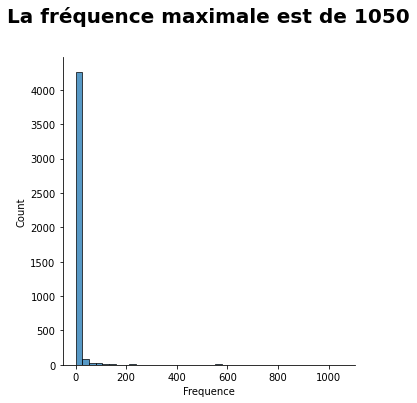

In [67]:
plt.figure(figsize=(20,10))
sns.displot(data=df_word_freq,bins=40, x="Frequence");
plt.title('La fréquence maximale est de 1050', fontsize = 20, pad = 35, fontweight = 'bold')
#Nous voyons que nous avons une fréquence des mots assez important compris
#entre 0 et 200 puis nous avons des outliers jusqu'a 800

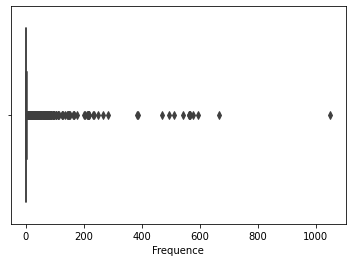

In [68]:
sns.boxplot(data=df_word_freq,x='Frequence');
#Nous avons beaucoup de valeurs aberrantes 
#Nous voyons que la variable frequence n'est pas normale 

In [69]:
df_word_freq['Frequence'].describe()
#Nous avons en moyenne une fréquence égale à 7
#avec un minimum égal à 1 et un maximum à 1050
#avec une mediane égal à 1 < moyenne égal a 6
#la pluspart de nos frequence sont supérieus à 6

count    4437.000000
mean        7.560288
std        37.350789
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max      1050.000000
Name: Frequence, dtype: float64

In [70]:
#utilisation de freq dist pour voir les mots les plus fréquents 
#Parmi les mots les plus frequents nous avons des mots avec 2 lettres
fq = nltk.FreqDist(words_dico)
fq.most_common(50)

[('', 1050),
 ('product', 666),
 ('free', 593),
 ('buy', 576),
 ('deliveri', 566),
 ('ship', 565),
 ('cash', 564),
 ('genuin', 564),
 ('price', 542),
 ('day', 513),
 ('replac', 493),
 ('guarante', 471),
 ('onlin', 389),
 ('flipkartcom', 384),
 ('general', 284),
 ('featur', 268),
 ('box', 250),
 ('type', 237),
 ('color', 231),
 ('packag', 219),
 ('sale', 219),
 ('number', 216),
 ('brand', 214),
 ('best', 214),
 ('pack', 212),
 ('materi', 203),
 ('key', 202),
 ('design', 177),
 ('great', 166),
 ('set', 165),
 ('india', 162),
 ('watch', 153),
 ('model', 148),
 ('dimens', 148),
 ('content', 146),
 ('specif', 145),
 ('ideal', 144),
 ('discount', 134),
 ('cotton', 128),
 ('analog', 127),
 ('made', 126),
 ('fabric', 114),
 ('detail', 113),
 ('print', 111),
 ('size', 111),
 ('use', 106),
 ('pattern', 105),
 ('qualiti', 104),
 ('showpiec', 103),
 ('name', 99)]

In [71]:
df_word_freq=df_word_freq.sort_values(by='Frequence',ascending=False)
#nous avons triés du plus grand au plus petit 

In [72]:
df_word_freq#les mots rs free products sont les plus présents

Mots  Frequence
0                    1050
144    product        666
213       free        593
218        buy        576
219   deliveri        566
...        ...        ...
2696   carrier          1
1003    heaven          1
1001      setb          1
996   mosquito          1
3081      slow          1

[4437 rows x 2 columns]

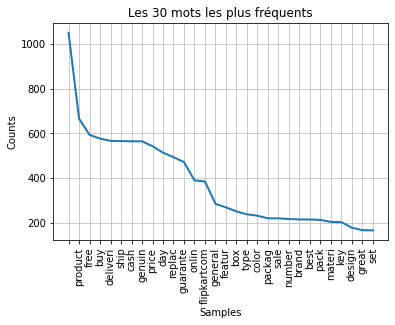

In [73]:
plt.figure()
fq.plot(30,cumulative=False,title='Les 30 mots les plus fréquents')


In [74]:
fq.pprint(maxlen=30)

FreqDist({'': 1050, 'product': 666, 'free': 593, 'buy': 576, 'deliveri': 566, 'ship': 565, 'cash': 564, 'genuin': 564, 'price': 542, 'day': 513, 'replac': 493, 'guarante': 471, 'onlin': 389, 'flipkartcom': 384, 'general': 284, 'featur': 268, 'box': 250, 'type': 237, 'color': 231, 'packag': 219, 'sale': 219, 'number': 216, 'brand': 214, 'best': 214, 'pack': 212, 'materi': 203, 'key': 202, 'design': 177, 'great': 166, 'set': 165, ...})


In [75]:
len(words_dico) #nous avons 4575 mots 

4437

In [76]:
words_freq = list()

for key, val in words_dico.items():
  words_freq.append( (key, val) )
  words_freq.sort(key=lambda tup: tup[1] ,reverse=True)
print("Le mot le plus fréquent : ",words_freq[0])

Le mot le plus fréquent :  ('', 1050)


In [77]:
len(words_freq)

4437

In [79]:
df=df_word_freq.sort_values(by='Frequence',ascending=False)
df=df.reset_index(drop=True)

In [80]:
df

Mots  Frequence
0                    1050
1      product        666
2         free        593
3          buy        576
4     deliveri        566
...        ...        ...
4432   coconut          1
4433  smoothen          1
4434  tranquil          1
4435       wax          1
4436      slow          1

[4437 rows x 2 columns]

In [81]:
df1=df.loc[0:30,['Mots','Frequence']]#les 30mots les plus frequents 

Text(0.5, 1.0, 'Les 30 mots les plus fréquents')

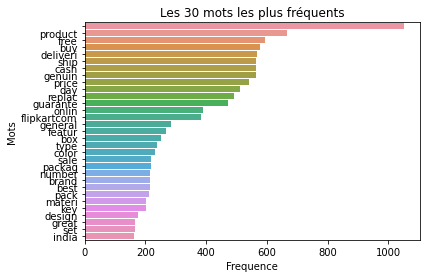

In [82]:
df1=df.loc[0:30,['Mots','Frequence']]#les 30mots les plus frequents 
plt.figure()
sns.barplot(y='Mots',x='Frequence',data=df1.sort_values('Frequence',ascending=False))
plt.title('Les 30 mots les plus fréquents')


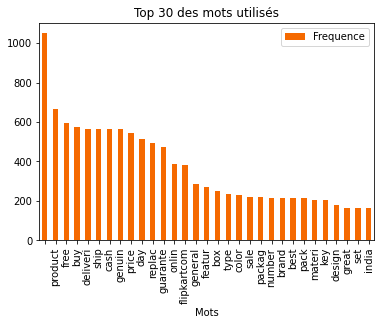

In [83]:
df1.plot(kind='bar',x='Mots',y='Frequence', color="#f56900",title='Top 30 des mots utilisés')

In [84]:
df=df_word_freq.sort_values(by='Frequence',ascending=True)
df=df.reset_index(drop=True)
#nous trions par ordre décroissant du plus petit au plus grand

In [85]:
df2=df.loc[0:30,['Mots','Frequence']]
df2=df2.reset_index(drop=True)
#on prend les 30 premiers mots avec une frequence egal à 1

Text(0.5, 1.0, 'Les 30 mots les moins fréquents')

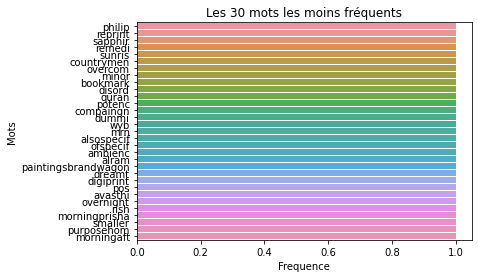

In [86]:
plt.figure()
sns.barplot(y='Mots',x='Frequence',data=df2.sort_values('Frequence',ascending=False))
plt.title('Les 30 mots les moins fréquents')

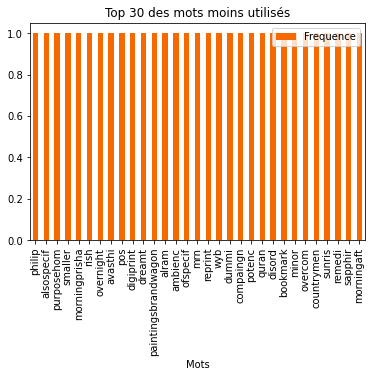

In [87]:
df2.plot(kind='bar',x='Mots',y='Frequence', color="#f56900",title='Top 30 des mots moins utilisés')

### Suppression mots moins frequents et plus frequents 

On va supprimer les mots avec une frequence egal à 1 car notre idée est de catégoriser nos produits a travers la description des produits. Si nous avons une description avec une frequence faible ceci nous donne aucune information sur la categorisation. De meme tous les mots les plus frequents permet de cerner le probléme mais ne permet pas de différencier les documents  

## Autres techniques de suppression

In [99]:
len(words_freq)

4437

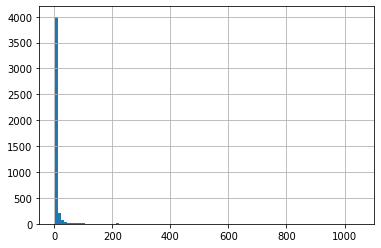

In [100]:
df_word_freq['Frequence'].hist(bins=100)

In [104]:
print(len(df_word_freq['Frequence'].index[df_word_freq['Frequence']>1050/2]),"mots aparaissent dans presque la moitié des descriptions")

9 mots aparaissent dans presque la moitié des descriptions


In [106]:
df_word_freq

Mots  Frequence
0                    1050
144    product        666
213       free        593
218        buy        576
219   deliveri        566
...        ...        ...
2696   carrier          1
1003    heaven          1
1001      setb          1
996   mosquito          1
3081      slow          1

[4437 rows x 2 columns]

In [122]:
i=df_word_freq['Frequence'][-10:].index
df_word_freq['Mots'][i]

2692         cumin
995           cvpc
2693    particular
2694      angelica
1004          knit
2696       carrier
1003        heaven
1001          setb
996       mosquito
3081          slow
Name: Mots, dtype: object

In [125]:
print(len(df_word_freq['Frequence'].index[df_word_freq['Frequence']==1]),"mots aparaissant une seule fois")

2510 mots aparaissant une seule fois


In [132]:
rem_list = list(df_word_freq['Frequence'].index[df_word_freq['Frequence']==1])
df_word_freq['Mots'][rem_list].values

array(['ipad', 'jointer', 'version', ..., 'setb', 'mosquito', 'slow'],
      dtype=object)

In [133]:
#suppression des mots avec des frequences egal à 1
data['description_final'] = data['description_stem1'].apply(lambda x: [i for i in x if i not in df_word_freq['Mots'][rem_list].values])

In [136]:
taille_mot(data,'description_final')

1933

In [137]:
data['description_final']

0       [key, featur, eleg, polyest, multicolor, abstr...
1       [specif, cotton, bath, towel, bath, towel, red...
2       [key, featur, cotton, terri, face, towel, set,...
3       [key, featur, santosh, royal, fashion, cotton,...
4       [key, featur, jaipur, print, cotton, floral, k...
                              ...                        
1045    [empow, extra, larg, self, adhes, sticker, pac...
1046    [wallmantra, larg, vinyl, sticker, sticker, pa...
1047    [buy, uberlyf, extra, larg, pigment, import, s...
1048    [buy, wallmantra, medium, vinyl, sticker, stic...
1049    [buy, uberlyf, larg, vinyl, sticker, onlin, ub...
Name: description_final, Length: 1050, dtype: object

In [138]:
top_list = list(df_word_freq['Frequence'].index[df_word_freq['Frequence']>1050/2])
df_word_freq['Mots'][top_list].values

array(['', 'product', 'free', 'buy', 'deliveri', 'ship', 'cash', 'genuin',
       'price'], dtype=object)

In [139]:
data['description_final1'] = data['description_final'].apply(lambda x: [i for i in x if i not in df_word_freq['Mots'][top_list].values])

In [142]:
taille_mot(data,'description_final1')

1925

In [143]:
data['description_final1']

0       [key, featur, eleg, polyest, multicolor, abstr...
1       [specif, cotton, bath, towel, bath, towel, red...
2       [key, featur, cotton, terri, face, towel, set,...
3       [key, featur, santosh, royal, fashion, cotton,...
4       [key, featur, jaipur, print, cotton, floral, k...
                              ...                        
1045    [empow, extra, larg, self, adhes, sticker, pac...
1046    [wallmantra, larg, vinyl, sticker, sticker, pa...
1047    [uberlyf, extra, larg, pigment, import, sticke...
1048    [wallmantra, medium, vinyl, sticker, sticker, ...
1049    [uberlyf, larg, vinyl, sticker, onlin, uberlyf...
Name: description_final1, Length: 1050, dtype: object

In [90]:
#fonction qui calcule les outliers ou l'utilisateur choisit son 
#il nous retourne les index les valeurs 
#en entree il nous donne le nom de la colonne 
def CalculOutlier(v):
  ecart=input('Donnez votre écart = ')
  ecart=float(ecart) #conversion de ecart en float
  #cette fonction nous donne les index et valeurs des valeurs aberrantes
  #le nom de la colonne
  Q1=v.quantile(0.25)
  Q3=v.quantile(0.75)
  EIQ=Q3-Q1
  LI=Q1-ecart*EIQ
  LS=Q3+ecart*EIQ
  i=list(v.index[(v < LI)|(v > LS)])
  val=list(v[i])
  print('Voila votre résultat pour un ecart interquartile de {}'.format(ecart))
  return i, val

In [91]:
#test avec la variable ingredients that may be from palm oil
outlier=CalculOutlier(df_word_freq['Frequence'])
#outlier[0]#donne les index
#outlier[1]#donne les valeurs 

Donnez votre écart = 6
Voila votre résultat pour un ecart interquartile de 6.0


In [92]:
len(outlier[0])

316

In [ ]:
i=outlier[0]
df_word_freq.loc[i,'Mots'].values

array(['', 'rs', 'product', 'free', 'buy', 'deliveri', 'ship', 'genuin',
       'cash', 'price', 'day', 'replac', 'guarante', 'onlin',
       'flipkartcom', 'general', 'featur', 'box', 'type', 'color', 'sale',
       'packag', 'number', 'brand', 'best', 'pack', 'materi', 'key', 'cm',
       'design', 'great', 'set', 'india', 'watch', 'dimens', 'model',
       'content', 'specif', 'ideal', 'discount', 'cotton', 'analog',
       'made', 'fabric', 'detail', 'size', 'print', 'use', 'pattern',
       'qualiti', 'showpiec', 'name', 'care', 'babi', 'gift', 'width',
       'water', 'combo', 'girl', 'multicolor', 'addit', 'boy', 'height',
       'men', 'perfect', 'make', 'weight', 'style', 'ceram', 'inch',
       'round', 'home', 'women', 'g', 'wash', 'mug', 'cover', 'comfort',
       'yes', 'resist', 'give', 'love', 'x', 'black', 'length', 'bodi',
       'strap', 'beauti', 'dial', 'one', 'look', 'ml', 'also', 'high',
       'occas', 'code', 'warranti', 'casual', 'light', 'blue', 'come',
      

In [ ]:
words_to_delete2=list(df_word_freq.loc[i,'Mots'].values)

In [ ]:
len(words_to_delete2)

550

In [ ]:
filtre1 = 1
#on va supprimer les mots trop rares c'est a  dire avec une frequence égal à 1
#qui ont une fréquence d'apparition =1
#nous pouvons utiliser soit words_freq et df_wordfreq
words_to_delete1= [t[0] for t in words_freq if t[1]==filtre1]
print((words_to_delete1)) # Mots qui seront éliminés

['wrinkl', 'valanc', 'modernist', 'romant', 'sunlightspecif', 'surreal', 'lovingthi', 'steal', 'apparanceg', 'ringit', 'duster', 'curtaineleg', 'interiorsthi', 'joyous', 'fabricit', 'sathiya', 'mediam', 'asvtwl', 'suscept', 'renown', 'cmsspecif', 'enrich', 'eurospa', 'shuvam', 'shuvampcftsetassort', 'goldbedi', 'giftingspecif', 'perfact', 'cottonjaipur', 'lifespecif', 'onl', 'r', 'maserati', 'camerii', 'wm', 'abroad', 'otherwis', 'ufttswbkbr', 'lifestyl', 'mundan', 'alram', 'remind', 'calnedar', 'hijri', 'wyb', 'gregorian', 'bookmark', 'quran', 'metr', 'cauba', 'heuer', 'sapphir', 'swissmad', 'els', 'sw', 'matter', 'execut', 'statement', 'calibro', 'mtg', 'cartier', 'lcs', 'caron', 'loi', 'titan', 'girlswatch', 'jewelri', 'srushti', 'arriv', 'megnet', 'megnetledsportblackr', 'atm', 'flaunt', 'mantra', 'worn', 'raini', 'escort', 'eblk', 'street', 'thank', 'blackl', 'klein', 'iwfk', 'moon', 'ion', 'fbc', 'rida', 'aplledblack', 'addarkorang', 'spethnic', 'fba', 'dgred', 'pl', 'sportier', 

In [ ]:
len(words_to_delete1)#nous avons 2579 mots 

2579

In [ ]:
#filtre2 = 10
#les 10 mots les plus fréquents 
#permet de cerner le probléme mais ne permets pas
#de différencier les documents 
#words_to_delete2=[t[0] for t in words_freq[:filtre2]]
#print(words_to_delete2)

In [ ]:
len(words_to_delete2)

550

In [ ]:
type(words_to_delete2)

list

In [ ]:
type(words_to_delete1)

list

In [ ]:
#on va fusionner les mots avec une fréquence égal à 1
#et les 550 mots qui int une fréquence aberrante
words_to_delete=words_to_delete1+words_to_delete2

In [ ]:
len(words_freq)

4575

In [ ]:
len(words_to_delete)#nous avons 3129 mots a supprimer
#a la base nous avons 4575 on va supprimer 3129 mots soit 68 %
#il va nous rester que 1446 soit 31% de mots qui vont rester 

3129

In [ ]:
from wordcloud import WordCloud

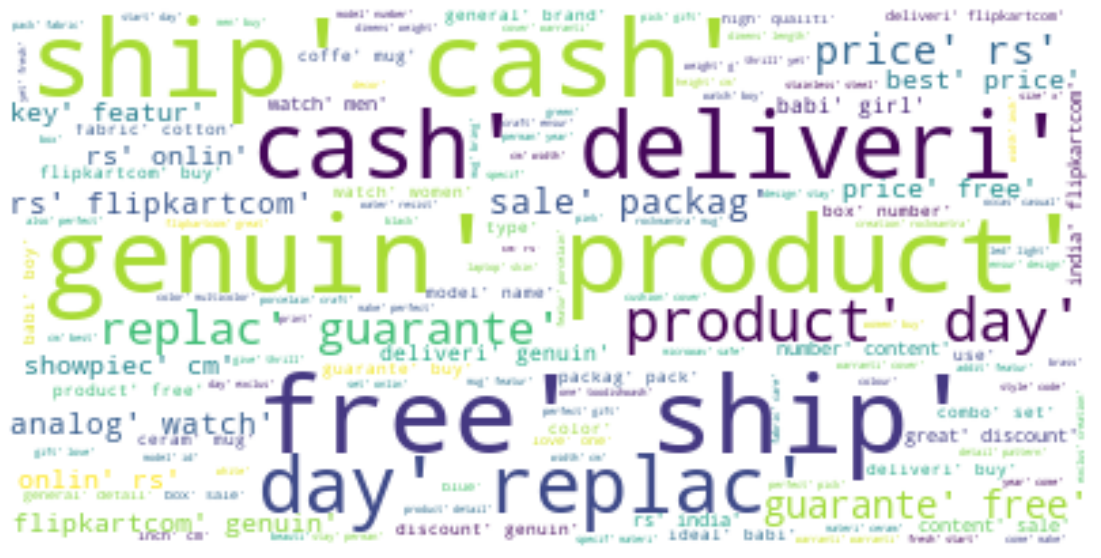

In [ ]:
#representattion des mots les plus frequents et moins fréquents 
stopwords = set(words_to_delete)
corpus=data['description_stem']
wordcloud = WordCloud(stopwords=stopwords, background_color="white")
text="".join(map(str, corpus)) 
wordcloud.generate(text)
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')

plt.show()

In [ ]:
import nltk
#stopword=nltk.corpus.stopwords.words('english')
stopwords = set(words_to_delete)#dictionnaire de mots a supprimer
def suppression_word(text) :
  text=[mot for mot in text if mot not in stopwords]
  return text

In [ ]:
# data['description_final']=data['description_stem'].apply(lambda x : suppression_word(x))

In [ ]:
#data['description_final']

0       [stitch, environ, ant, anti, shrinkag, attent,...
1                                                      []
2       [terri, terri, assort, export, textur, deserv,...
3                   [santosh, wed, santosh, santosh, wed]
4       [jaipur, nice, nice, fast, jaipur, jaipur, jai...
                              ...                        
1045    [empow, extra, adhes, big, arrang, altern, d�c...
1046    [wallmantra, refresh, deserv, decal, latest, t...
1047    [uberlyf, extra, pigment, uberlyf, extra, pigm...
1048                             [wallmantra, wallmantra]
1049                                   [uberlyf, uberlyf]
Name: description_final, Length: 1050, dtype: object

In [ ]:
taille_mot(data,'description_final')

1456

### Analyse exploratoire apres suppression

In [ ]:
stats, freq = dict(), dict()
for k, v in data['description_final'].iteritems():
  freq[k] = fq = nltk.FreqDist(v)
  stats[k] = {'total': len(v)} 
# Premièrement, on récupère la fréquence totale de chaque mot sur tout le corpus d'artistes
freq_totale = nltk.Counter()
for k, v in data['description_final'].iteritems():
    freq_totale += freq[k]

In [144]:
stats, freq = dict(), dict()
for k, v in data['description_final1'].iteritems():
  freq[k] = fq = nltk.FreqDist(v)
  stats[k] = {'total': len(v)} 
# Premièrement, on récupère la fréquence totale de chaque mot sur tout le corpus d'artistes
freq_totale = nltk.Counter()
for k, v in data['description_final'].iteritems():
    freq_totale += freq[k]

In [145]:
freq_totale.keys()

dict_keys(['key', 'featur', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'height', 'pack', 'enhanc', 'look', 'made', 'high', 'qualiti', 'style', 'stitch', 'metal', 'make', 'room', 'environ', 'ant', 'anti', 'shrinkag', 'home', 'bright', 'appeal', 'design', 'attent', 'sure', 'heart', 'contemporari', 'slide', 'smooth', 'draw', 'apart', 'first', 'thing', 'morn', 'welcom', 'sun', 'ray', 'want', 'wish', 'good', 'whole', 'world', 'close', 'even', 'creat', 'special', 'moment', 'beauti', 'given', 'sooth', 'print', 'bring', 'soft', 'filter', 'light', 'get', 'right', 'amount', 'general', 'brand', 'type', 'model', 'name', 'set', 'color', 'dimens', 'length', 'box', 'number', 'content', 'sale', 'packag', 'bodi', 'materi', 'specif', 'cotton', 'bath', 'towel', 'red', 'yellow', 'blue', 'machin', 'washabl', 'yes', 'self', 'gsm', 'ideal', 'men', 'women', 'boy', 'girl', 'size', 'inch', 'width', 'terri', 'face', 'small', 'piec', 'assort', 'exclus', 'export', 'textur',

In [146]:
freq_totale.values()

dict_values([227, 407, 60, 68, 167, 53, 44, 39, 52, 63, 115, 341, 20, 109, 185, 114, 242, 115, 7, 29, 153, 69, 4, 5, 6, 2, 168, 20, 14, 387, 5, 44, 7, 13, 4, 33, 10, 4, 12, 3, 27, 4, 5, 5, 9, 5, 37, 10, 18, 2, 16, 15, 49, 7, 151, 2, 3, 276, 88, 86, 3, 153, 82, 18, 4, 288, 247, 324, 220, 107, 314, 365, 175, 109, 294, 250, 159, 262, 277, 101, 307, 170, 286, 64, 106, 61, 51, 107, 45, 34, 115, 28, 19, 167, 176, 139, 184, 242, 201, 232, 130, 10, 38, 26, 50, 8, 60, 15, 6, 14, 122, 170, 126, 20, 3, 3, 25, 70, 10, 32, 16, 65, 34, 60, 40, 28, 131, 18, 139, 28, 44, 29, 55, 199, 36, 102, 6, 26, 22, 29, 78, 59, 8, 42, 206, 79, 216, 206, 71, 106, 63, 15, 53, 77, 7, 123, 65, 7, 67, 50, 20, 7, 2, 246, 2, 50, 24, 13, 12, 2, 59, 255, 360, 396, 180, 472, 189, 134, 552, 570, 473, 3, 5, 39, 39, 10, 9, 31, 78, 4, 9, 41, 58, 17, 6, 8, 39, 9, 37, 104, 5, 6, 5, 52, 4, 9, 24, 4, 10, 42, 2, 4, 32, 3, 4, 10, 3, 3, 9, 3, 17, 84, 23, 66, 6, 7, 38, 126, 89, 102, 9, 8, 4, 34, 45, 8, 38, 48, 45, 8, 3, 151, 9, 5, 15, 

In [147]:
df=pd.DataFrame({'mots':freq_totale.keys(),'Frequence':freq_totale.values()})

In [148]:
df

mots  Frequence
0               key        227
1            featur        407
2              eleg         60
3           polyest         68
4        multicolor        167
...             ...        ...
1920  residuespecif         10
1921    suitablefor         11
1922          patta          2
1923          d�cor          2
1924        uberlyf          4

[1925 rows x 2 columns]

Text(0.5, 1.0, 'La fréquence maximale est 53')

<Figure size 1440x720 with 0 Axes>

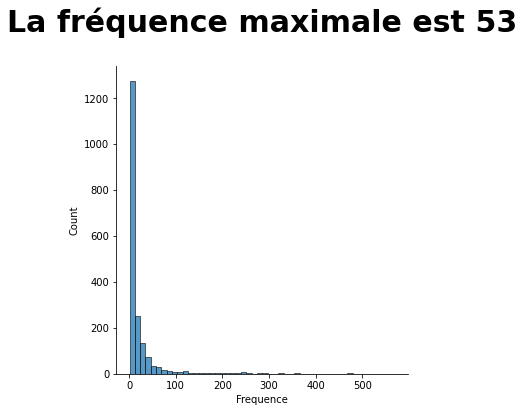

In [149]:
plt.figure(figsize=(20,10))
sns.displot(data=df,bins=50, x="Frequence");
plt.title('La fréquence maximale est 53', fontsize = 30, pad = 35, fontweight = 'bold')

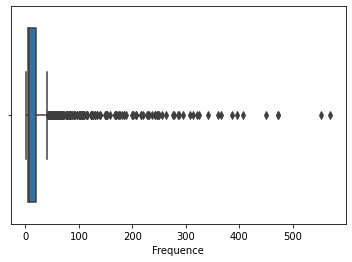

In [150]:
sns.boxplot(data=df,x='Frequence');

In [ ]:
df['Frequence'].describe()

count    1462.000000
mean        6.515732
std         5.240234
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        53.000000
Name: Frequence, dtype: float64

In [ ]:
data['description_final']

0       [stitch, environ, ant, anti, shrinkag, attent,...
1                                                      []
2       [terri, terri, assort, export, textur, deserv,...
3                   [santosh, wed, santosh, santosh, wed]
4       [jaipur, nice, nice, fast, jaipur, jaipur, jai...
                              ...                        
1045    [empow, extra, adhes, big, arrang, altern, d�c...
1046    [wallmantra, refresh, deserv, decal, latest, t...
1047    [uberlyf, extra, pigment, uberlyf, extra, pigm...
1048                             [wallmantra, wallmantra]
1049                                   [uberlyf, uberlyf]
Name: description_final, Length: 1050, dtype: object

## Suppression des mots avec deux lettres et une lettre

In [ ]:
stop=[w for w in df['mots'] if len(w) <= 2]

In [ ]:
len(stop)

60

In [ ]:
stop

['±',
 'sl',
 'dw',
 'us',
 'p',
 'b',
 'c',
 '°c',
 '°f',
 'ss',
 'fb',
 'q',
 'u',
 'gb',
 'wd',
 'dg',
 'hz',
 'fs',
 '’',
 'na',
 'la',
 'im',
 'h',
 'xx',
 '•',
 'pg',
 'vj',
 'gm',
 'mp',
 'sd',
 'va',
 '�',
 'aa',
 'co',
 'yl',
 'ym',
 'nx',
 'ie',
 'sf',
 'pp',
 'fd',
 'nb',
 '–',
 'hd',
 'th',
 'tb',
 'cc',
 'sj',
 'ft',
 'uv',
 'pa',
 'xl',
 'e',
 'st',
 'tr',
 'ad',
 'tc',
 '“',
 '”',
 'oz']

In [ ]:
import nltk
#stopword=nltk.corpus.stopwords.words('english')
stopwords = set(stop)#dictionnaire de mots a supprimer
def suppression_word(text) :
  text=[mot for mot in text if mot not in stopwords]
  return text

In [ ]:
#data['description_fin']=data['description_final'].apply(lambda x : suppression_word(x))

In [151]:
data['description_fin']=data['description_final1']

In [152]:
taille_mot(data,'description_fin')

1925

# Bag of words 

## Comptage Simple nombre d'apparition

In [153]:
#https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_extraction
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#data['description_fin']=[" ".join(review) for review in data['description_fin'].values]

In [154]:
corpus=data['description_fin'].apply(lambda x: ','.join(x))
corpus

0       key,featur,eleg,polyest,multicolor,abstract,ey...
1       specif,cotton,bath,towel,bath,towel,red,yellow...
2       key,featur,cotton,terri,face,towel,set,size,sm...
3       key,featur,santosh,royal,fashion,cotton,print,...
4       key,featur,jaipur,print,cotton,floral,king,siz...
                              ...                        
1045    empow,extra,larg,self,adhes,sticker,pack,doubl...
1046    wallmantra,larg,vinyl,sticker,sticker,pack,bri...
1047    uberlyf,extra,larg,pigment,import,sticker,onli...
1048    wallmantra,medium,vinyl,sticker,sticker,onlin,...
1049    uberlyf,larg,vinyl,sticker,onlin,uberlyf,larg,...
Name: description_fin, Length: 1050, dtype: object

In [155]:
data['description_fin']

0       [key, featur, eleg, polyest, multicolor, abstr...
1       [specif, cotton, bath, towel, bath, towel, red...
2       [key, featur, cotton, terri, face, towel, set,...
3       [key, featur, santosh, royal, fashion, cotton,...
4       [key, featur, jaipur, print, cotton, floral, k...
                              ...                        
1045    [empow, extra, larg, self, adhes, sticker, pac...
1046    [wallmantra, larg, vinyl, sticker, sticker, pa...
1047    [uberlyf, extra, larg, pigment, import, sticke...
1048    [wallmantra, medium, vinyl, sticker, sticker, ...
1049    [uberlyf, larg, vinyl, sticker, onlin, uberlyf...
Name: description_fin, Length: 1050, dtype: object

In [156]:
vectorizer = CountVectorizer(ngram_range=(1,1),analyzer = "word")
X = vectorizer.fit_transform(corpus)

In [157]:
features_names=vectorizer.get_feature_names()
dense=X.todense()
denselist=dense.tolist()
#comptage_mots=pd.DataFrame(denselist,columns=features_names)
comptage_mots=pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
comptage_mots.head()

aapno  abil  abl  abod  absorb  ...  yuva  zero  zipper  zone  zyxel
0      0     0    0     0       0  ...     0     0       0     0      0
1      0     0    0     0       0  ...     0     0       0     0      0
2      0     0    0     0       1  ...     0     0       0     0      0
3      0     0    0     0       0  ...     0     0       0     0      0
4      0     0    0     0       0  ...     0     0       0     0      0

[5 rows x 1923 columns]

In [158]:
comptage_mots.shape

(1050, 1923)

In [159]:

df=pd.DataFrame({'Mots Frequents': comptage_mots.max().sort_values(ascending=False).index,'Total':comptage_mots.max().sort_values(ascending=False).values})

In [160]:
df

Mots Frequents  Total
0              bowl     21
1            laptop     21
2           blanket     19
3              skin     18
4             towel     18
...             ...    ...
1918      floralina      1
1919          memor      1
1920          secur      1
1921        mesleep      1
1922          zyxel      1

[1923 rows x 2 columns]

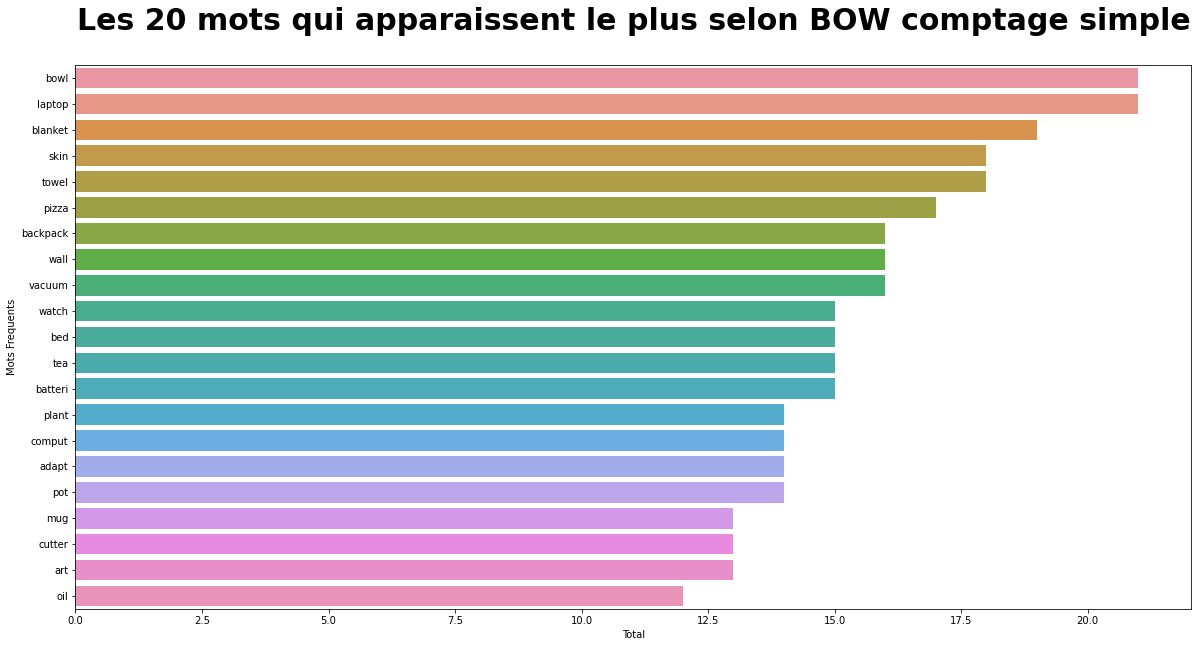

In [161]:
df1=df.loc[0:20,['Mots Frequents','Total']]#les 30mots les plus frequents 
plt.figure(figsize=(20,10))
sns.barplot(y='Mots Frequents',x='Total',data=df1.sort_values('Total',ascending=False))
plt.title('Les 20 mots qui apparaissent le plus selon BOW comptage simple', fontsize = 30, pad = 35, fontweight = 'bold');

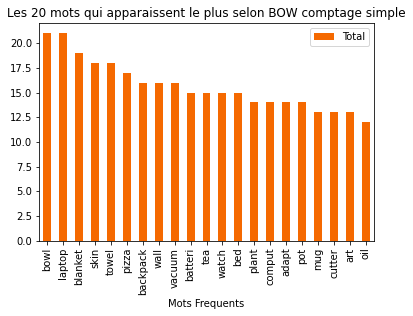

In [162]:
df1.plot(kind='bar',x='Mots Frequents',y='Total', color="#f56900",title='Les 20 mots qui apparaissent le plus selon BOW comptage simple');

In [163]:
comptage_mots.to_csv('Bagofwords_count.csv')

## Comptage frequence tf-idf

La matrice TF-IDF est définie pour chaque mot relativement à un corpus, comme le produit TF * IDF où:

    TF = nombre de fois où le mot est dans le document / nombre de mots dans le document
    IDF = nombre de documents / nombre de documents où apparaît le mot


In [164]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [165]:
vect=TfidfVectorizer (analyzer='word', stop_words= 'english',ngram_range=(1,1))
tfidf_mat=vect.fit_transform(corpus)

In [166]:
features_names=vect.get_feature_names()
dense=tfidf_mat.todense()
denselist=dense.tolist()
frequence_mots=pd.DataFrame(denselist,columns=features_names)
frequence_mots.head()

aapno  abil  abl  abod    absorb  ...  yuva  zero  zipper  zone  zyxel
0    0.0   0.0  0.0   0.0  0.000000  ...   0.0   0.0     0.0   0.0    0.0
1    0.0   0.0  0.0   0.0  0.000000  ...   0.0   0.0     0.0   0.0    0.0
2    0.0   0.0  0.0   0.0  0.062175  ...   0.0   0.0     0.0   0.0    0.0
3    0.0   0.0  0.0   0.0  0.000000  ...   0.0   0.0     0.0   0.0    0.0
4    0.0   0.0  0.0   0.0  0.000000  ...   0.0   0.0     0.0   0.0    0.0

[5 rows x 1850 columns]

In [167]:
frequence_mots.shape

(1050, 1850)

In [168]:
df=pd.DataFrame({'Mots Frequents': frequence_mots.max().sort_values(ascending=False).index,'Total':frequence_mots.max().sort_values(ascending=False).values})

In [169]:
df

Mots Frequents     Total
0              cooker  0.950931
1                true  0.946885
2              shadow  0.931857
3              kadhai  0.907521
4               intex  0.883088
...               ...       ...
1845  vgncrelsmartpro  0.048313
1846           deviat  0.045055
1847          volateg  0.045055
1848      orderspecif  0.045055
1849        complianc  0.045055

[1850 rows x 2 columns]

In [170]:
df_max_word_freq = pd.Series(frequence_mots.max(axis=0))
df_max_word_freq.sort_values(ascending = True)[0:50]

complianc          0.045055
orderspecif        0.045055
volateg            0.045055
deviat             0.045055
vgncrelsmartpro    0.048313
buddhist           0.055864
wisdom             0.055864
waterservic        0.055864
deva               0.055864
claim              0.058425
magsafehako        0.058425
circuit            0.058425
physcal            0.058425
respect            0.058425
guid               0.058425
equip              0.058425
exposur            0.060643
socialis           0.060691
coversparkl        0.060691
anymor             0.060691
jazz               0.060691
pep                0.060691
mood               0.060691
forlarg            0.060691
bedspecif          0.060691
photogen           0.060691
regul              0.060794
spiritu            0.060794
dilut              0.060833
gms                0.061129
possibl            0.062998
secur              0.064146
minim              0.066207
instrument         0.066207
germ               0.067074
plane              0

Text(0.5, 1.0, 'Les 20 mots avec la fréquence TFIDF la plus élevée')

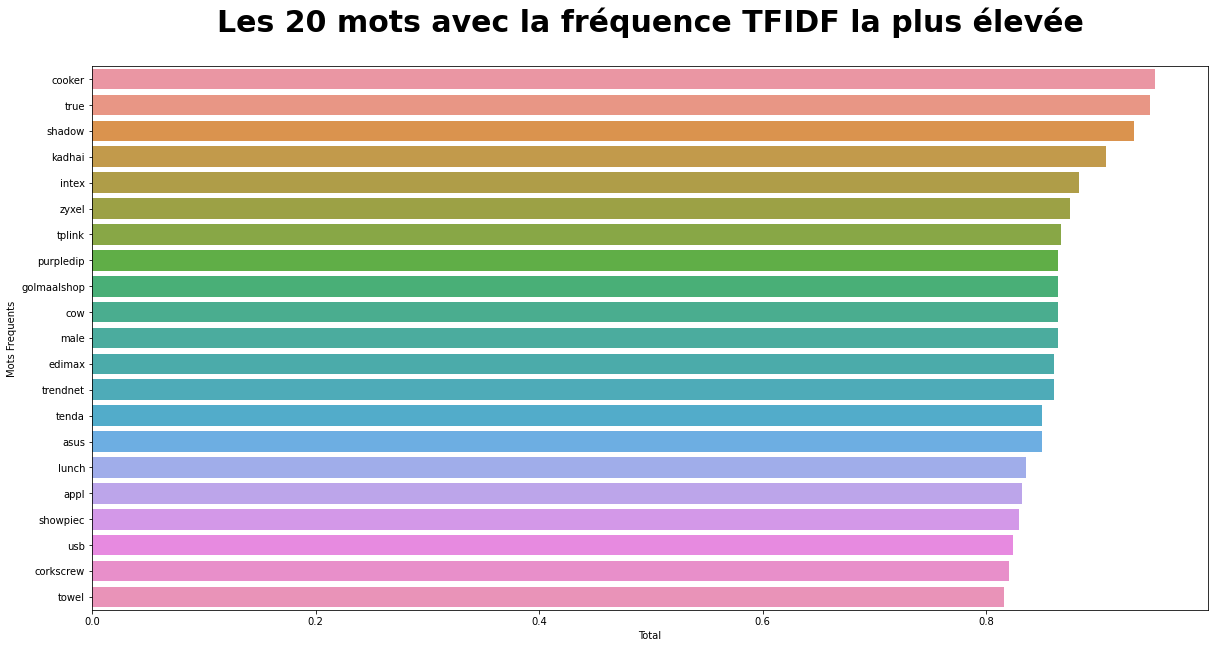

In [171]:
df1=df.loc[0:20,['Mots Frequents','Total']]#les 20mots les plus frequents 
plt.figure(figsize=(20,10))
sns.barplot(y='Mots Frequents',x='Total',data=df1.sort_values('Total',ascending=False))
plt.title('Les 20 mots avec la fréquence TFIDF la plus élevée',fontsize = 30, pad = 35, fontweight = 'bold')

In [172]:
frequence_mots.describe()

aapno         abil  ...         zone        zyxel
count  1050.000000  1050.000000  ...  1050.000000  1050.000000
mean      0.001362     0.000314  ...     0.000867     0.001843
std       0.025685     0.008521  ...     0.019868     0.035547
min       0.000000     0.000000  ...     0.000000     0.000000
25%       0.000000     0.000000  ...     0.000000     0.000000
50%       0.000000     0.000000  ...     0.000000     0.000000
75%       0.000000     0.000000  ...     0.000000     0.000000
max       0.552527     0.269382  ...     0.464454     0.874517

[8 rows x 1850 columns]

In [173]:
frequence_mots.to_csv('Bagofwords_frequence.csv')

## Comptage des mots booleen

https://www.youtube.com/watch?v=lZzJRjKJ1XU
Si True, tous les comptes non nuls sont définis sur 1. Ceci est utile pour les modèles probabilistes qui modélisent des événements binaires plutôt qu'entiers  Il va regarder sur la ligne si le mot est présent si c'est vrais il met 1 si il n'est pas présent il met 0

In [174]:
vectorizer = CountVectorizer(binary='true')
X = vectorizer.fit_transform(corpus)

In [175]:
features_names=vectorizer.get_feature_names()
dense=X.todense()
denselist=dense.tolist()
booleen_mots=pd.DataFrame(denselist,columns=features_names)
booleen_mots.head()

aapno  abil  abl  abod  absorb  ...  yuva  zero  zipper  zone  zyxel
0      0     0    0     0       0  ...     0     0       0     0      0
1      0     0    0     0       0  ...     0     0       0     0      0
2      0     0    0     0       1  ...     0     0       0     0      0
3      0     0    0     0       0  ...     0     0       0     0      0
4      0     0    0     0       0  ...     0     0       0     0      0

[5 rows x 1923 columns]

In [ ]:
booleen_mots.to_csv('Bagofwords_booleen.csv')

#  (ACP) et clustering kmeans comptage simple

Nous allons utiliser l'ACP pour faire une visualisation.

## ACP sur les features 



In [176]:
#telechargement de la table
databow=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/P6 Classifiez des biens /Bagofwords_count.csv',index_col=0)

In [177]:
databow.head()

aapno  abil  abl  abod  absorb  ...  yuva  zero  zipper  zone  zyxel
0      0     0    0     0       0  ...     0     0       0     0      0
1      0     0    0     0       0  ...     0     0       0     0      0
2      0     0    0     0       1  ...     0     0       0     0      0
3      0     0    0     0       0  ...     0     0       0     0      0
4      0     0    0     0       0  ...     0     0       0     0      0

[5 rows x 1923 columns]

In [178]:
databow.shape

(1050, 1923)

In [179]:
databow.describe()

aapno         abil  ...         zone        zyxel
count  1050.000000  1050.000000  ...  1050.000000  1050.000000
mean      0.007619     0.002857  ...     0.004762     0.002857
std       0.151066     0.068980  ...     0.127213     0.053401
min       0.000000     0.000000  ...     0.000000     0.000000
25%       0.000000     0.000000  ...     0.000000     0.000000
50%       0.000000     0.000000  ...     0.000000     0.000000
75%       0.000000     0.000000  ...     0.000000     0.000000
max       4.000000     2.000000  ...     4.000000     1.000000

[8 rows x 1923 columns]

In [180]:
databow.columns

Index(['aapno', 'abil', 'abl', 'abod', 'absorb', 'abstract', 'accent',
       'access', 'accessori', 'accid',
       ...
       'yet', 'york', 'young', 'your', 'youth', 'yuva', 'zero', 'zipper',
       'zone', 'zyxel'],
      dtype='object', length=1923)

In [181]:
X=databow.values
#from sklearn import preprocessing
#std_scale=preprocessing.StandardScaler().fit(X)
#Xd=std_scale.transform(X)

features=databow.columns
from sklearn import decomposition
n_comp=0.95
pca=decomposition.PCA(n_components=n_comp)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [182]:
# fonction qui trace le graphique des eboulis des valeurs propres
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    #plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(), c="red", marker='.')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

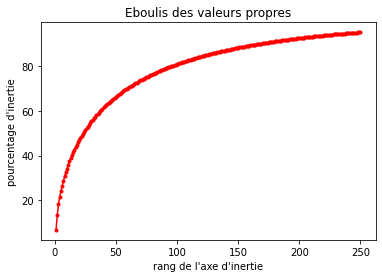

In [183]:
#graphique eboulis des valeurs propres
display_scree_plot(pca)

In [184]:
pcs=pca.components_ #calcul des différents composantes

In [185]:
pca.explained_variance_ratio_ 
#proportion de variance expliquée pour chaque axe factoriel 

array([0.06878049, 0.06449799, 0.05106697, 0.03085459, 0.0262489 ,
       0.02315819, 0.0223511 , 0.02008217, 0.01820714, 0.01712412,
       0.01691644, 0.01482391, 0.01465807, 0.01359361, 0.01276808,
       0.01206151, 0.01143259, 0.01079991, 0.01059153, 0.00978754,
       0.00957765, 0.00925576, 0.00872126, 0.008581  , 0.00828127,
       0.00787718, 0.00769751, 0.00762811, 0.00741426, 0.00734838,
       0.00721143, 0.00709608, 0.00673336, 0.00651536, 0.00635233,
       0.00611188, 0.00588543, 0.00572097, 0.00570491, 0.00554206,
       0.00539671, 0.00530042, 0.00519702, 0.00494006, 0.00484988,
       0.00468299, 0.00458157, 0.00451782, 0.00444056, 0.0043135 ,
       0.00424071, 0.00422279, 0.00411683, 0.00403208, 0.00393481,
       0.00382698, 0.00373901, 0.0036618 , 0.00360722, 0.00357797,
       0.00351544, 0.00346635, 0.00339486, 0.00336475, 0.00330346,
       0.00324516, 0.00319238, 0.0031372 , 0.0031046 , 0.0030232 ,
       0.00296803, 0.00292371, 0.00285795, 0.00278278, 0.00276

In [186]:
pca.explained_variance_ratio_.cumsum()
#proportion de variance cumulée


array([0.06878049, 0.13327848, 0.18434545, 0.21520004, 0.24144893,
       0.26460712, 0.28695822, 0.30704039, 0.32524753, 0.34237165,
       0.3592881 , 0.37411201, 0.38877008, 0.40236369, 0.41513177,
       0.42719328, 0.43862588, 0.44942579, 0.46001732, 0.46980486,
       0.47938251, 0.48863827, 0.49735952, 0.50594052, 0.51422179,
       0.52209897, 0.52979648, 0.53742458, 0.54483885, 0.55218722,
       0.55939866, 0.56649474, 0.5732281 , 0.57974345, 0.58609579,
       0.59220767, 0.5980931 , 0.60381406, 0.60951898, 0.61506104,
       0.62045775, 0.62575817, 0.63095519, 0.63589526, 0.64074514,
       0.64542813, 0.6500097 , 0.65452752, 0.65896808, 0.66328158,
       0.66752229, 0.67174508, 0.67586191, 0.67989399, 0.68382879,
       0.68765577, 0.69139478, 0.69505658, 0.6986638 , 0.70224177,
       0.70575721, 0.70922357, 0.71261843, 0.71598318, 0.71928664,
       0.7225318 , 0.72572418, 0.72886139, 0.73196599, 0.73498919,
       0.73795722, 0.74088093, 0.74373888, 0.74652166, 0.74928

In [187]:
n=databow.shape[0]
p=databow.shape[1]
eigval=(n-1)/n*pca.explained_variance_#valeurs propres
#racine carre valeur propre
sqrt_eigval=np.sqrt(eigval)
corvar=np.zeros((p,p))
for k in range(2):
  corvar[:,k]=pca.components_[k,:]*sqrt_eigval[k]
print(corvar) #affichage matrice de correlation
#les variables sont en ligne et les facteurs en colonnes 
#matice des corrélation

[[-8.74550604e-05 -2.37312261e-04  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 3.19505799e-04  5.29746790e-04  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.78689262e-03  4.13367498e-03  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 3.49214460e-03  6.78518128e-03  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 2.21286193e-03  3.17185129e-03  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.42569187e-03 -8.54575377e-04  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [188]:
df=pd.DataFrame({'id':databow.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]})
df.sort_values(by=['COR_1'],ascending=False) #matrice de corrélation pour les deux premiers plans 

id     COR_1     COR_2
1113          mug  1.588984 -0.898730
452        design  0.567765  0.114827
1242      perfect  0.539639 -0.252286
261         ceram  0.485116 -0.259929
316         coffe  0.480603 -0.273649
...           ...       ...       ...
54         analog -0.150450 -0.081563
1180        onlin -0.193669 -0.125437
1848        watch -0.197059 -0.105212
758      guarante -0.228447 -0.141457
654   flipkartcom -0.243114 -0.141885

[1923 rows x 3 columns]

In [ ]:
df.sort_values(by=['COR_2'],ascending=False)

id     COR_1     COR_2
1314      vaio -0.072237  0.609423
1140  smartpro -0.053406  0.451192
301    current -0.035401  0.299195
1151      soni -0.027627  0.230867
1327   vgncrel -0.021855  0.185636
...        ...       ...       ...
528     gather -0.002534 -0.004020
1228       tea  0.000416 -0.004388
925      plant  0.000628 -0.004541
185     carpet -0.002941 -0.004872
155       bowl -0.003807 -0.010260

[1402 rows x 3 columns]

Text(0, 0.5, 'PC2(6.4%)')

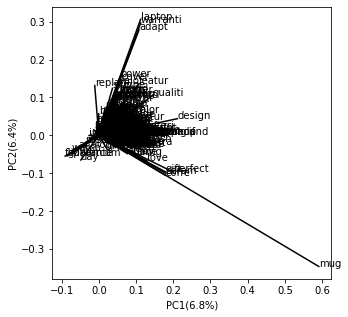

In [190]:
#enumerate permet de prendre les index et valeur
#zip permet d'afficher les elements de deux listes 
#on va afficher la position de nos features sur nos premiéres composantes en vue de 
#voir leur disposition
plt.figure(figsize=(5,5))
for i,(x,y) in enumerate(zip(pcs[0,:],pcs[1,:])):
    plt.plot([0,x],[0,y],color='k')
    plt.text(x,y,databow.columns[i])
#plt.axhline(0,c='black',ls='--')
#plt.axvline(0,c='black',ls='--')
plt.xlabel('PC1(6.8%)')
plt.ylabel('PC2(6.4%)')

Pas trés pertinent de projeter sur les deux premieres axes on a que 0.07 % de variance expliquée 

In [191]:
X_projected=pca.transform(X) #Calcul des projections de X

In [192]:
X_projected[:,0].max()#composante1

15.978724108475054

In [193]:
X_projected[:,1].max()#composante 2

19.46507825552109

In [194]:
print("Dimensions dataset avant réduction PCA : ", databow.shape)
print("Dimensions dataset aprés réduction PCA en gardant 95% de variance expliquée: ", X_projected.shape)

Dimensions dataset avant réduction PCA :  (1050, 1923)
Dimensions dataset aprés réduction PCA en gardant 95% de variance expliquée:  (1050, 250)


In [195]:
X_projected.shape,databow.shape #on garde 96% de variance expliquée 
#en passant à 350 features 

((1050, 250), (1050, 1923))

In [196]:
df_pca = pd.DataFrame({
    "Dim1" : X_projected[:,0], 
    "Dim2" : X_projected[:,1], 
})

In [197]:
data['cat_lvl_1'].values

array(['Home Furnishing', 'Baby Care', 'Baby Care', ..., 'Baby Care',
       'Baby Care', 'Baby Care'], dtype=object)

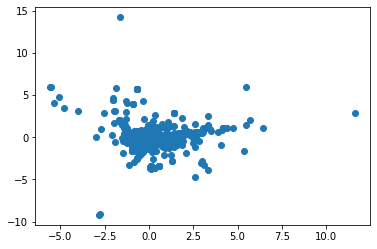

In [198]:
plt.scatter(X_projected[:,8],X_projected[:,9])

Text(0.5, 0.98, 'Premier plan factoriel')

<Figure size 1080x1080 with 0 Axes>

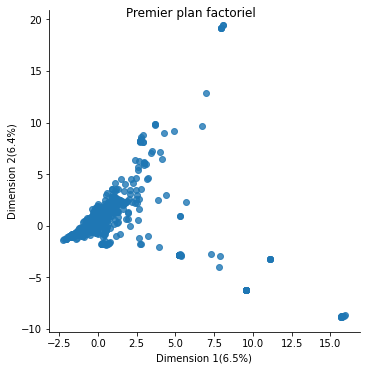

In [200]:
#Affichage de nos corpus sur les premiers axes
#de la projection
plt.figure(figsize=(15,15))
g_pca = sns.lmplot(x='Dim1', y='Dim2',data=df_pca,fit_reg = False)
g_pca.set(xlabel = "Dimension 1(6.5%)", ylabel = "Dimension 2(6.4%)")
g_pca.fig.suptitle("Premier plan factoriel")

## *Clustering*

### Choix du nombre de cluster 

Nous avons vus dans la partie nettoyage de la variable catégorie
qu'on a 7 catégories de produits qui sont équilibrés avec pour catégorie 150 éléments, nous allons essayer de comparer cette information en utilisant les méthodes de recherche du nombre de clusters la courbe elbow. On va chercher  le point d'inflexion de la courbe en calculant la somme des distances entre les points d'un cluster et son centroide equivaut a minimiser la variance des clusters 

In [202]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn import metrics, cluster


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


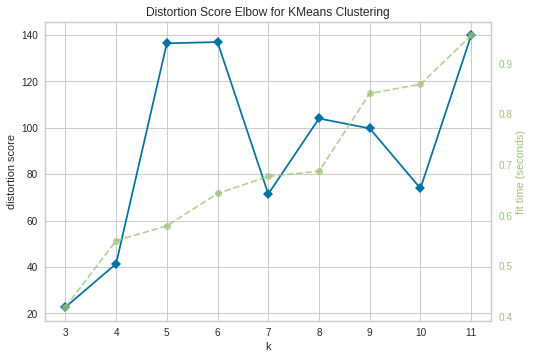

In [ ]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
model = cluster.KMeans()
visualizer = KElbowVisualizer(model, k=(3,12))
visualizer.fit(X)   
visualizer.poof() 
#on prend la Somme des distances au carré des échantillons à 
#leur centre de cluster le plus proche.
#inertia_

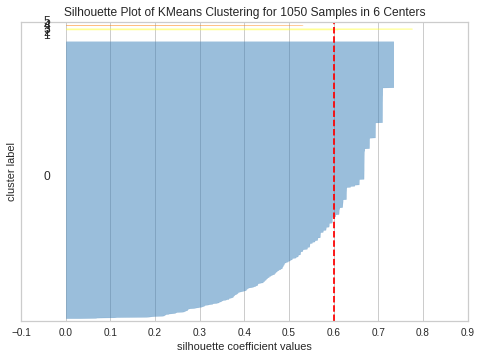

In [ ]:
#coefficient prés de +1 échantillons trés éloigné des grappes voisins
#coefficient egal à0 echantillon sur ou tres pres de la limite de la la décision entre 
#deux grappes
#coefficient negatif échantillons affectés au mauvais cluster 
#coefficient prés de +1 échantillons trés éloigné des grappes voisins
#coefficient egal à0 echantillon sur ou tres pres de la limite de la la décision entre 
#deux grappes
#coefficient negatif échantillons affectés au mauvais cluster 
model = cluster.KMeans(6)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(X)
visualizer.poof()
#https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

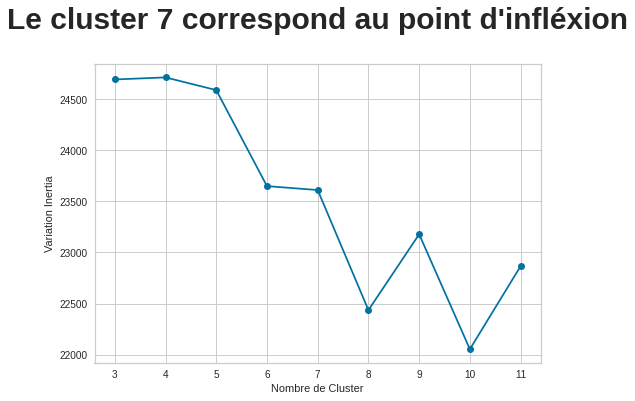

In [ ]:
distortions = []
K = range(3,12)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k,n_init=1,init='random')
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
plt.figure()
plt.plot(range(3,12),distortions,marker='o');
plt.xlabel('Nombre de Cluster')
plt.ylabel('Variation Inertia')
plt.title('Le cluster 7 correspond au point d\'infléxion', fontsize = 30, pad = 35, fontweight = 'bold');

le premier point d'inflexion est 7 on va prendre celui la comme notre nombre de cluster pour la suite de notre étude

### Avec les features



In [203]:
cls=cluster.KMeans(n_clusters=7)
cls.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [204]:
cls.predict(X)#la meme chose que cls.labels

array([2, 2, 5, ..., 2, 2, 2], dtype=int32)

In [205]:
labels = pd.DataFrame(cls.labels_)

In [206]:
databow = databow.assign(Cluster=labels)

In [207]:
databow.tail()

aapno  abil  abl  abod  absorb  ...  zero  zipper  zone  zyxel  Cluster
1045      0     0    0     0       0  ...     0       0     0      0        2
1046      0     0    0     0       0  ...     0       0     0      0        2
1047      0     0    0     0       0  ...     0       0     0      0        2
1048      0     0    0     0       0  ...     0       0     0      0        2
1049      0     0    0     0       0  ...     0       0     0      0        2

[5 rows x 1924 columns]

In [208]:
databow.groupby('Cluster').mean()

aapno      abil       abl  ...    zipper      zone     zyxel
Cluster                                ...                              
0        0.000000  0.000000  0.013514  ...  0.000000  0.000000  0.000000
1        0.000000  0.000000  0.000000  ...  0.076923  0.000000  0.000000
2        0.010899  0.004087  0.008174  ...  0.000000  0.006812  0.004087
3        0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000
4        0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000
5        0.000000  0.000000  0.000000  ...  0.021978  0.000000  0.000000
6        0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000

[7 rows x 1923 columns]

In [ ]:
cls.cluster_centers_#position des centroides 

array([[0.00770713, 0.00289017, 0.00770713, ..., 0.00289017, 0.00481696,
        0.00289017],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [209]:
# reduce the cluster centers to 2D
#pour tracer les centres de classes
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

In [210]:
databow['Cluster'].value_counts()

2    734
0    148
5     91
4     52
1     13
3      7
6      5
Name: Cluster, dtype: int64

### TSNE et ACP VISUALISATION

In [211]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=5)
X_tsne = tsne.fit_transform(X)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
#df_tsne["class"] = data["label_name"]
print(df_tsne.shape)

(1050, 2)


In [212]:
df_tsne.head()

tsne1      tsne2
0  18.218306 -60.769260
1  42.247372 -10.089403
2  40.648598  -4.404638
3  64.245186 -10.718377
4  64.037857 -10.054036

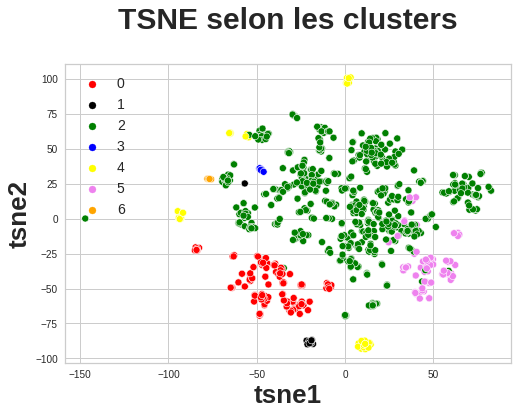

In [213]:
#graphe des clusters en fonction des deux premieres composantes de l'acp
plt.figure()
pal = ['red', 'black', 'green', 'blue', 'yellow', 'violet','orange']
sns.scatterplot(y='tsne2', x='tsne1', hue=databow['Cluster'],
                    palette=pal, data=df_tsne)
plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

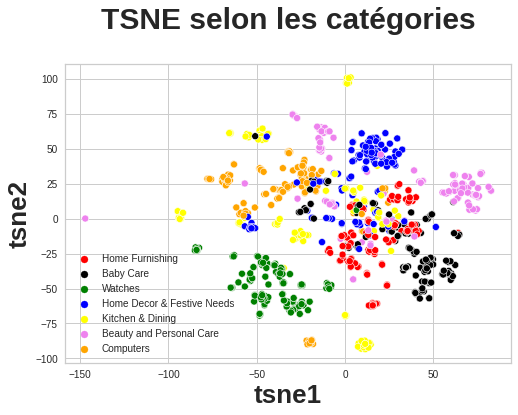

In [215]:
plt.figure()
pal = ['red', 'black', 'green', 'blue', 'yellow', 'violet','orange']
sns.scatterplot(y='tsne2', x='tsne1', hue=data['cat_lvl_1'],
                    palette=pal, data=df_tsne)
plt.title('TSNE selon les catégories', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(loc='lower left') 



In [216]:
df_pca

Dim1      Dim2
0     2.538096  2.196969
1     0.606793  1.767279
2     2.293658  4.163636
3     2.165577  4.524942
4     3.081088  5.977702
...        ...       ...
1045  0.963064  1.686820
1046  2.683036  1.662968
1047 -1.290895 -0.740642
1048 -1.291833 -0.715055
1049 -1.297117 -0.731557

[1050 rows x 2 columns]

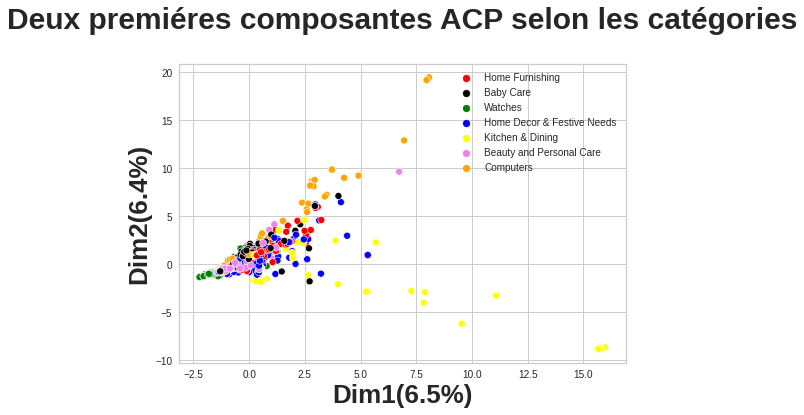

In [221]:
plt.figure()
pal = ['red', 'black', 'green', 'blue', 'yellow', 'violet','orange']
sns.scatterplot(y='Dim2', x='Dim1', hue=data['cat_lvl_1'],
                    palette=pal, data=df_pca)
plt.title('Deux premiéres composantes ACP selon les catégories', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('Dim1(6.5%)', fontsize = 26, fontweight = 'bold')
plt.ylabel('Dim2(6.4%)', fontsize = 26, fontweight = 'bold')
plt.legend(loc='upper right')

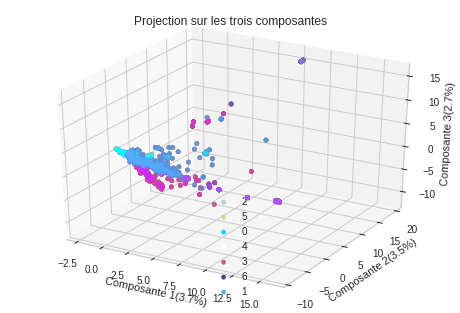

In [222]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100
group=('0','1','2','3','4','5','6')
# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m,i in zip(['Blues', 'BrBG','jet','flag','flare','icefire','cool'],databow['Cluster'].unique()):

    xs = X_projected[:,0]
    ys = X_projected[:,1]
    zs = X_projected[:,2]
    ax.scatter(xs, ys, zs,c=databow['Cluster'],cmap=m,label=i)

ax.set_xlabel('Composante 1(3.7%)')
ax.set_ylabel('Composante 2(3.5%)')
ax.set_zlabel('Composante 3(2.7%)')
plt.title('Projection sur les trois composantes')
ax.legend(loc='lower center')

In [223]:
databow.columns

Index(['aapno', 'abil', 'abl', 'abod', 'absorb', 'abstract', 'accent',
       'access', 'accessori', 'accid',
       ...
       'york', 'young', 'your', 'youth', 'yuva', 'zero', 'zipper', 'zone',
       'zyxel', 'Cluster'],
      dtype='object', length=1924)

In [224]:
data.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications', 'cat_lvl_1',
       'cat_lvl_2', 'cat_lvl_3', 'description_nopunc', 'description_nodg',
       'description_token', 'description_stop', 'description_stem',
       'description_stem1', 'description_final', 'description_final1',
       'description_fin'],
      dtype='object')

In [225]:
data['cat_lvl_1'].unique()

array(['Home Furnishing', 'Baby Care', 'Watches',
       'Home Decor & Festive Needs', 'Kitchen & Dining',
       'Beauty and Personal Care', 'Computers'], dtype=object)

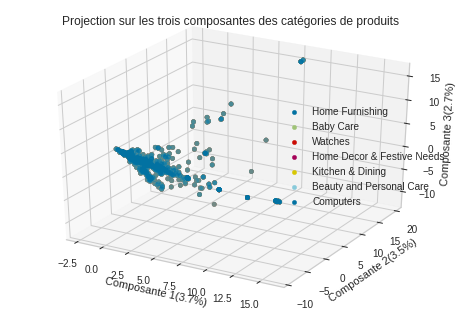

In [226]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
resultats=encoder.fit_transform(data['cat_lvl_1'])

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m,i in zip(['Blues', 'BrBG','jet','flag','flare','icefire','cool'],data['cat_lvl_1'].unique()):

    xs = X_projected[:,0]
    ys = X_projected[:,1]
    zs = X_projected[:,2]
    ax.scatter(xs, ys, zs,cmap=m,label=i)

ax.set_xlabel('Composante 1(3.7%)')
ax.set_ylabel('Composante 2(3.5%)')
ax.set_zlabel('Composante 3(2.7%)')
plt.title('Projection sur les trois composantes des catégories de produits')
ax.legend(loc='right')

In [227]:
import plotly.express as px

fig = px.scatter(df_tsne, x="tsne1",y="tsne2", color=databow['Cluster'])
fig.show()

In [228]:
data.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications', 'cat_lvl_1',
       'cat_lvl_2', 'cat_lvl_3', 'description_nopunc', 'description_nodg',
       'description_token', 'description_stop', 'description_stem',
       'description_stem1', 'description_final', 'description_final1',
       'description_fin'],
      dtype='object')

### Mesures performances cluster et stabilité

In [229]:
print('Le coefficient de silhouette kmeans est',metrics.silhouette_score(X,cls.labels_))

Le coefficient de silhouette kmeans est -0.02511644898601851


In [230]:
print('Le coefficient de davies bouldin kmeans  est',metrics.davies_bouldin_score(X,cls.labels_))
#un davies faible implique des clusters homogenes 

Le coefficient de davies bouldin kmeans  est 1.8344153594687829


In [231]:
cls.inertia_

87368.62796694801

In [232]:
data['cat_lvl_1'].value_counts()

Home Furnishing               150
Watches                       150
Home Decor & Festive Needs    150
Computers                     150
Beauty and Personal Care      150
Kitchen & Dining              150
Baby Care                     150
Name: cat_lvl_1, dtype: int64

In [233]:
#on va regarder la stabilité de notre clustering
#en le comparant avec les catégories de produits
#avant de faire cela nous allons tranformer les modalités de la variable categorie
#en utilisant l'encodage 
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
resultats=encoder.fit_transform(data['cat_lvl_1'])

In [ ]:
#encoder.inverse_transform(resultats)#ceci permet de retrouver les vraisvaleurs 

In [234]:
resultats

array([4, 0, 0, ..., 0, 0, 0])

In [235]:
#Calcul du rand index pour verifier la stabilité de notre clustering
from sklearn import metrics
ari = metrics.adjusted_rand_score(resultats,cls.labels_)
print(ari)
#la correspondance entre nos clusters et le nombre de catégories n'est pas
#vraiment réelle 

0.153899412611064


# ACP et clustering comptage fréquence 

In [236]:
#telechargement de la table
databow2=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/P6 Classifiez des biens /Bagofwords_frequence.csv',index_col=0)

In [ ]:
databow2.head()

aapno  abil  abl  abod    absorb  ...  yuva  zero  zipper  zone  zyxel
0    0.0   0.0  0.0   0.0  0.000000  ...   0.0   0.0     0.0   0.0    0.0
1    0.0   0.0  0.0   0.0  0.000000  ...   0.0   0.0     0.0   0.0    0.0
2    0.0   0.0  0.0   0.0  0.150196  ...   0.0   0.0     0.0   0.0    0.0
3    0.0   0.0  0.0   0.0  0.000000  ...   0.0   0.0     0.0   0.0    0.0
4    0.0   0.0  0.0   0.0  0.000000  ...   0.0   0.0     0.0   0.0    0.0

[5 rows x 1363 columns]

## ACP

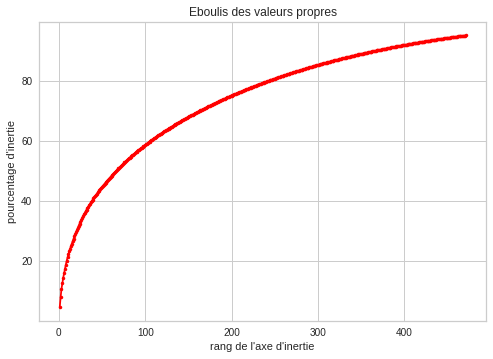

In [237]:
Xf=databow2.values
#from sklearn import preprocessing
#std_scale=preprocessing.StandardScaler().fit(Xf)
#Xff=std_scale.transform(Xf)
features=databow2.columns
from sklearn import decomposition
n_comp=0.95#nombre de composantes maximum a calculer pour l'acp
pca=decomposition.PCA(n_components=n_comp)
pca.fit(Xf)
#nous luis donnons les données centrés et réduites  
#nous lui donnons les données quantitatives en vue quil calcul les composantes
#graphique eboulis des valeurs propres
#pour la representation de nos individus 
display_scree_plot(pca)

In [238]:
pca.explained_variance_

array([0.04367638, 0.03160096, 0.02649289, 0.01899895, 0.01665313,
       0.01432187, 0.01399512, 0.01366661, 0.012067  , 0.0111913 ,
       0.01007464, 0.0091142 , 0.00887543, 0.00853208, 0.00802269,
       0.00781528, 0.00775813, 0.00750025, 0.00716652, 0.00707282,
       0.006849  , 0.00672835, 0.00660907, 0.00641266, 0.00621609,
       0.00601009, 0.0056883 , 0.00560808, 0.00551005, 0.00526425,
       0.00503992, 0.00495003, 0.0048051 , 0.00462532, 0.00458716,
       0.00448327, 0.00444915, 0.00427653, 0.00426602, 0.00417597,
       0.00406771, 0.00394434, 0.00392837, 0.00381591, 0.00376613,
       0.00372695, 0.00364173, 0.00358057, 0.00350348, 0.00346206,
       0.00339965, 0.00337872, 0.00332277, 0.00327797, 0.00327314,
       0.00320047, 0.00316029, 0.003108  , 0.00308038, 0.00304326,
       0.00303647, 0.00301321, 0.00297132, 0.00294784, 0.00294133,
       0.00291817, 0.00288257, 0.0028544 , 0.00282967, 0.00281232,
       0.0028022 , 0.00274621, 0.00273043, 0.00269342, 0.00266

In [239]:
pca.explained_variance_ratio_.cumsum()

array([0.04548445, 0.0783936 , 0.10598321, 0.12576866, 0.14311118,
       0.15802593, 0.17260041, 0.18683278, 0.19939931, 0.2110539 ,
       0.2215456 , 0.2310371 , 0.24027996, 0.24916524, 0.25752004,
       0.26565886, 0.27373815, 0.28154889, 0.28901208, 0.29637769,
       0.30351022, 0.3105171 , 0.31739977, 0.32407789, 0.3305513 ,
       0.33681019, 0.34273397, 0.34857421, 0.35431235, 0.35979453,
       0.36504309, 0.37019804, 0.37520206, 0.38001886, 0.38479591,
       0.38946477, 0.3940981 , 0.39855167, 0.40299429, 0.40734314,
       0.41157923, 0.41568686, 0.41977786, 0.42375173, 0.42767377,
       0.431555  , 0.43534749, 0.43907628, 0.4427248 , 0.44633018,
       0.44987056, 0.45338916, 0.45684948, 0.46026315, 0.46367179,
       0.46700474, 0.47029585, 0.47353251, 0.47674041, 0.47990965,
       0.48307182, 0.48620977, 0.48930409, 0.49237396, 0.49543705,
       0.49847602, 0.50147793, 0.50445049, 0.50739729, 0.51032604,
       0.51324424, 0.51610414, 0.51894759, 0.52175252, 0.52453

In [240]:
X_projectedf=pca.transform(Xf)
pca_dff = pd.DataFrame({
    "Dim1" : X_projectedf[:,0], 
    "Dim2" : X_projectedf[:,1], 
})


In [241]:
pca_dff.shape

(1050, 2)

In [242]:
X_projectedf.shape,Xf.shape

((1050, 471), (1050, 1850))

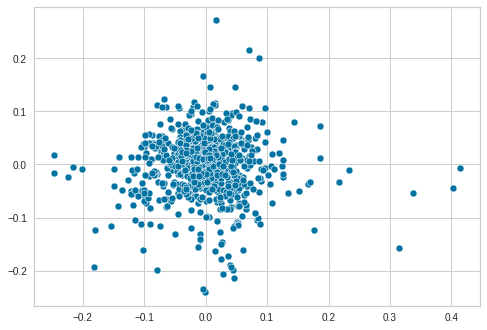

In [243]:
sns.scatterplot(x=X_projectedf[:,56],y=X_projectedf[:,57])

Text(0.5, 0.98, 'Premier plan factoriel')

<Figure size 1080x1080 with 0 Axes>

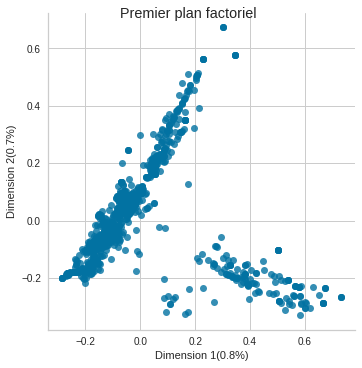

In [244]:
plt.figure(figsize=(15,15))
g_pca = sns.lmplot(x='Dim1', y='Dim2',data=pca_dff,fit_reg = False)
g_pca.set(xlabel = "Dimension 1(0.8%)", ylabel = "Dimension 2(0.7%)")
g_pca.fig.suptitle("Premier plan factoriel")

## Clustering

### Choix du nombre de cluster 

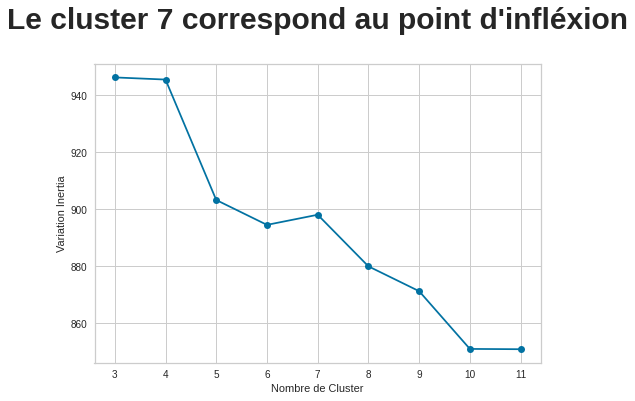

In [245]:
distortions = []
K = range(3,12)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k,n_init=1,init='random')
    kmeanModel.fit(Xf)
    distortions.append(kmeanModel.inertia_)
plt.figure()
plt.plot(range(3,12),distortions,marker='o');
plt.xlabel('Nombre de Cluster')
plt.ylabel('Variation Inertia')
plt.title('Le cluster 7 correspond au point d\'infléxion', fontsize = 30, pad = 35, fontweight = 'bold');


### Avec les features 

In [246]:
mycls=cluster.KMeans(n_clusters=7)
mycls.fit(Xf)
labels = pd.DataFrame(mycls.labels_)
databow2 = databow2.assign(Cluster=labels)

In [247]:
databow2.head()

aapno  abil  abl  abod    absorb  ...  zero  zipper  zone  zyxel  Cluster
0    0.0   0.0  0.0   0.0  0.000000  ...   0.0     0.0   0.0    0.0        0
1    0.0   0.0  0.0   0.0  0.000000  ...   0.0     0.0   0.0    0.0        0
2    0.0   0.0  0.0   0.0  0.062175  ...   0.0     0.0   0.0    0.0        0
3    0.0   0.0  0.0   0.0  0.000000  ...   0.0     0.0   0.0    0.0        0
4    0.0   0.0  0.0   0.0  0.000000  ...   0.0     0.0   0.0    0.0        0

[5 rows x 1851 columns]

### TSNE pour la visualisation et ACP Deux composantes 

In [248]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=5)
X_tsne = tsne.fit_transform(Xf)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
#df_tsne["class"] = data["label_name"]
print(df_tsne.shape)

(1050, 2)


Text(0.5, 1.0, 'Représentation des clusters selon TSNE')

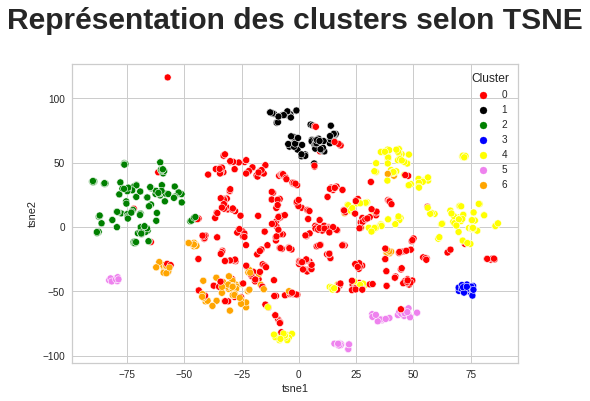

In [249]:
#graphe des clusters en fonction des deux premieres composantes de l'acp
plt.figure()
pal = ['red', 'black', 'green', 'blue', 'yellow', 'violet','orange']
sns.scatterplot(y='tsne2', x='tsne1', hue=databow2['Cluster'],
                    palette=pal, data=df_tsne)
plt.title('Représentation des clusters selon TSNE', fontsize = 30, pad = 35, fontweight = 'bold')

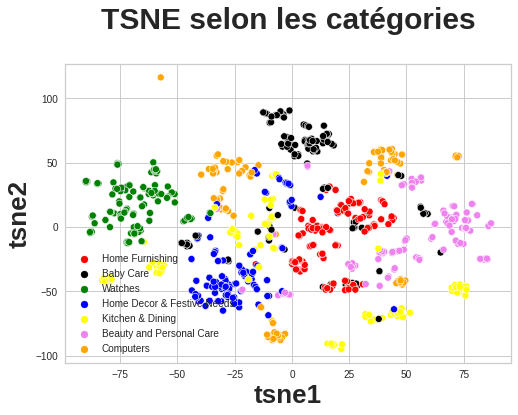

In [250]:
plt.figure()
pal = ['red', 'black', 'green', 'blue', 'yellow', 'violet','orange']
sns.scatterplot(y='tsne2', x='tsne1', hue=data['cat_lvl_1'],
                    palette=pal, data=df_tsne)
plt.title('TSNE selon les catégories', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(loc='lower left') 


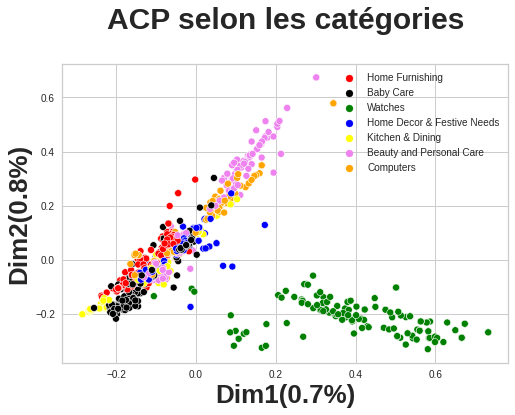

In [251]:
plt.figure()
pal = ['red', 'black', 'green', 'blue', 'yellow', 'violet','orange']
sns.scatterplot(y='Dim2', x='Dim1', hue=data['cat_lvl_1'],
                    palette=pal, data=pca_dff)
plt.title('ACP selon les catégories', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('Dim1(0.7%)', fontsize = 26, fontweight = 'bold')
plt.ylabel('Dim2(0.8%)', fontsize = 26, fontweight = 'bold')
plt.legend() 

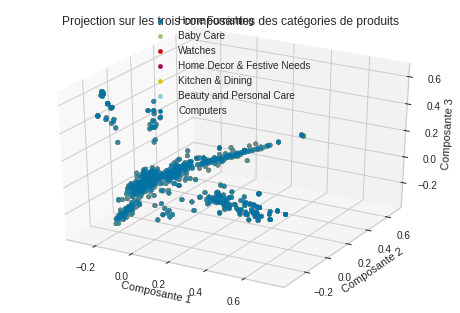

In [252]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
resultats=encoder.fit_transform(data['cat_lvl_1'])

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m,i in zip(['Blues', 'BrBG','jet','flag','flare','icefire','cool'],data['cat_lvl_1'].unique()):

    xs = X_projectedf[:,0]
    ys = X_projectedf[:,1]
    zs = X_projectedf[:,2]
    ax.scatter(xs, ys, zs,cmap=m,label=i)

ax.set_xlabel('Composante 1')
ax.set_ylabel('Composante 2')
ax.set_zlabel('Composante 3')
plt.title('Projection sur les trois composantes des catégories de produits')
ax.legend(loc='upper center')

### Mesure performance cluster et stabilité  

In [253]:
print('Le coefficient de silhouette kmeans est',metrics.silhouette_score(Xf,mycls.labels_))

Le coefficient de silhouette kmeans est 0.07066919165688763


In [254]:
print('Le coefficient de davies bouldin kmeans  est',metrics.davies_bouldin_score(Xf,mycls.labels_))
#un davies faible implique des clusters homogenes 

Le coefficient de davies bouldin kmeans  est 3.6199608262640552


In [256]:
from sklearn import metrics
ari = metrics.adjusted_rand_score(resultats,mycls.labels_)
print(ari)
#la correspondance entre nos clusters et le nombre de catégories n'est pas
#vraiment réelle 

0.23987064264848573


# LDA sur BOW comptage simple

la LDA permet de faire le regroupement d'infos si on n'a pas beacoup d'informations sur le corpus. lda permet de structurer automatiquement l’information, de manière à pouvoir rapidement accéder à ce qui nous intéresse, filtrer le bruit mais aussi détecter l’apparition de nouveau sujet d’intérêts

In [257]:
corpus=data['description_fin'].apply(lambda x: ' '.join(x))
corpus
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [258]:
X

<1050x1923 sparse matrix of type '<class 'numpy.int64'>'
	with 25354 stored elements in Compressed Sparse Row format>

In [259]:
from sklearn.decomposition import LatentDirichletAllocation
n_topics =7
#le nombre de catégories 


# Créer le modèle LDA
lda = LatentDirichletAllocation(
        n_components=n_topics, 
        max_iter=5, 
        learning_method='online', 
        learning_offset=50.,
        random_state=0)

# Fitter sur les données
lda.fit(X)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=5,
                          mean_change_tol=0.001, n_components=7, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [260]:
data['cat_lvl_1'].unique()

array(['Home Furnishing', 'Baby Care', 'Watches',
       'Home Decor & Festive Needs', 'Kitchen & Dining',
       'Beauty and Personal Care', 'Computers'], dtype=object)

In [261]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10 #nombre de mots dans le topic 
display_topics(lda, vectorizer.get_feature_names(), no_top_words)
#pour voir la categorisation du texte 

Topic 0:
duvet kit mxofer soap sapato aloevera rose jasmin honey papaya
Topic 1:
eye beauti lip oxyglow cream vitamin face massag fruit help
Topic 2:
babi cotton fabric girl detail general featur pack number packag
Topic 3:
skin print set type model pack design combo color polyest
Topic 4:
laptop warranti sticker usb wall pad mous appli shape adapt
Topic 5:
day replac guarante flipkartcom onlin watch analog best showpiec india
Topic 6:
mug ceram design gift perfect home materi make one love


On peut remarquer que le topic 0 repésente l'univers des photos de l'ocean
topic 1 semble etre dans la catégorie 'Beauty and Personal Care
topic 2 semble correspondre a la catégorie de Home Decor & Festive Needs (decoration et fete)
topic 3 semble correspondre a la categorie computers 


# IMAGES 

## Chargement des images 

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
#https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html
#https://fr.accentsconagua.com/articles/code/histogram-equalization-in-python.html
#https://towardsdatascience.com/basics-of-kernels-and-convolutions-with-opencv-c15311ab8f55
#Cours sur les filtres 
#https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04

In [ ]:
#from IPython.display import Image
#Image("/content/drive/MyDrive/Colab Notebooks/P6 Classifiez des biens /Images/"+ str(data.head(1)['image'].values.tolist()[0]), width=100 )

In [ ]:
#Photos=data

In [ ]:
#Photos['image'] = Photos['image'].apply(lambda x: '/content/drive/MyDrive/Colab Notebooks/P6 Classifiez des biens /Images/'+str(x))

In [ ]:
#Photos['image'].head()

In [ ]:
#Image(Photos.iloc[12]['image'], width=150)

In [ ]:
#Photos.iloc[12]

In [ ]:
#Image(Photos['image'][0])

In [ ]:
from os import listdir
path = "/content/drive/MyDrive/Colab Notebooks/P6 Classifiez des biens /Images/"
list_photos = [file for file in listdir(path)]
print(len(list_photos))

1050


In [ ]:
list_photos[1]

'b4d35b6536b623c83b293eb3a1c02bba.jpg'

In [ ]:
type(list_photos)

list

In [ ]:
data2 = pd.DataFrame()
data2["image_path"] = list_photos

In [ ]:
data.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications', 'cat_lvl_1',
       'cat_lvl_2', 'cat_lvl_3', 'description_nopunc', 'description_nodg',
       'description_token', 'description_stop', 'description_stem',
       'description_final', 'description_fin'],
      dtype='object')

In [ ]:
data2.head()

image_path
0  69446af66066146718cd569f87e99fff.jpg
1  b4d35b6536b623c83b293eb3a1c02bba.jpg
2  f01140c02fd09e5c56312a64fa8db3da.jpg
3  6329ddb46087cb8c09ced95471dd9643.jpg
4  e2ae2af58ac50adf4881751ae84a9d8a.jpg

In [ ]:
data3=data[['image','cat_lvl_1']]

In [ ]:
data3.head()

image        cat_lvl_1
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg  Home Furnishing
1  7b72c92c2f6c40268628ec5f14c6d590.jpg        Baby Care
2  64d5d4a258243731dc7bbb1eef49ad74.jpg        Baby Care
3  d4684dcdc759dd9cdf41504698d737d8.jpg  Home Furnishing
4  6325b6870c54cd47be6ebfbffa620ec7.jpg  Home Furnishing

In [ ]:
data4=pd.merge(data2,data3,right_on='image',left_on='image_path')

In [ ]:
data4=data4.drop(columns='image')

In [ ]:
data4.head()

image_path         cat_lvl_1
0  69446af66066146718cd569f87e99fff.jpg  Kitchen & Dining
1  b4d35b6536b623c83b293eb3a1c02bba.jpg         Computers
2  f01140c02fd09e5c56312a64fa8db3da.jpg  Kitchen & Dining
3  6329ddb46087cb8c09ced95471dd9643.jpg         Computers
4  e2ae2af58ac50adf4881751ae84a9d8a.jpg         Computers

In [ ]:
data4.shape

(1050, 2)

In [ ]:
data4.isna().sum()

image_path    0
cat_lvl_1     0
dtype: int64

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data4["label"] = le.fit_transform(data4["cat_lvl_1"])
data4

image_path                 cat_lvl_1  label
0     69446af66066146718cd569f87e99fff.jpg          Kitchen & Dining      5
1     b4d35b6536b623c83b293eb3a1c02bba.jpg                 Computers      2
2     f01140c02fd09e5c56312a64fa8db3da.jpg          Kitchen & Dining      5
3     6329ddb46087cb8c09ced95471dd9643.jpg                 Computers      2
4     e2ae2af58ac50adf4881751ae84a9d8a.jpg                 Computers      2
...                                    ...                       ...    ...
1045  493d1eb6ad7a48a926092bf994cd0bb0.jpg          Kitchen & Dining      5
1046  d1899ab1d5c79ddaa311bc9f04d198ed.jpg                 Computers      2
1047  02a53d335775b652f22f41b529b9d646.jpg  Beauty and Personal Care      1
1048  e7cab08a267e815c72a26513222783e0.jpg          Kitchen & Dining      5
1049  3388d05e88972ff9f3e1321dc0cfdc28.jpg          Kitchen & Dining      5

[1050 rows x 3 columns]

In [ ]:
data4.groupby('label').count()
#aucun de nos images n'ont des labels 

image_path  cat_lvl_1
label                       
0             150        150
1             150        150
2             150        150
3             150        150
4             150        150
5             150        150
6             150        150

## Affichage de quelques images selon categorie produit

In [ ]:
data4['cat_lvl_1'].value_counts().index

Index(['Computers', 'Watches', 'Kitchen & Dining',
       'Home Decor & Festive Needs', 'Beauty and Personal Care',
       'Home Furnishing', 'Baby Care'],
      dtype='object')

In [ ]:
from matplotlib.image import imread
def list_fct(name):
    list_image_name = [list_photos[i]
                       for i in range(len(data4)) if data4["cat_lvl_1"][i] == name]
    return list_image_name


In [ ]:
list_computers = [list_photos[i]
               for i in range(len(data4)) if data4["cat_lvl_1"][i] == "Computers"]

list_beauty = [list_photos[i]
               for i in range(len(data4)) if data4["cat_lvl_1"][i] == "Beauty and Personal Care"]
        
list_kitchen = [list_photos[i]
               for i in range(len(data4)) if data4["cat_lvl_1"][i] == "kitchen & Dining"]
            
list_watches = [list_photos[i]
               for i in range(len(data4)) if data4["cat_lvl_1"][i] == "Watches"]
              
list_baby= [list_photos[i]
               for i in range(len(data4)) if data4["cat_lvl_1"][i] == "Baby Care"]

list_home = [list_photos[i]
               for i in range(len(data4)) if data4["cat_lvl_1"][i] == "Home Furnishing"]
              

list_decor = [list_photos[i]
               for i in range(len(data4)) if data4["cat_lvl_1"][i] == "Home Decor & Festive Needs"]

Home Furnishing
-------


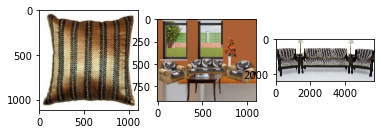

Watches
-------


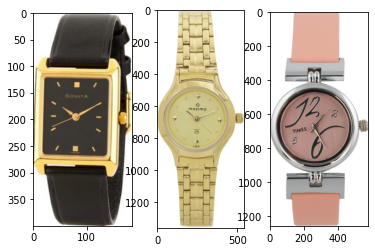

Home Decor & Festive Needs
-------


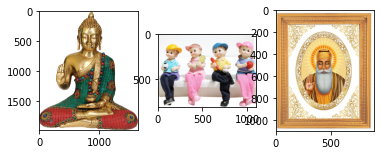

Baby Care
-------


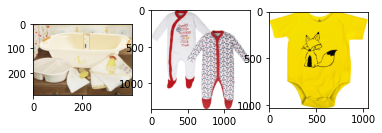

Computers
-------


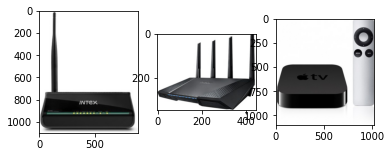

Beauty and Personal Care
-------


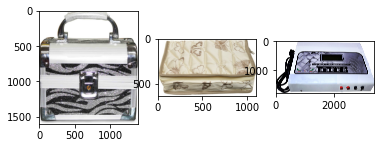

Kitchen & Dining
-------


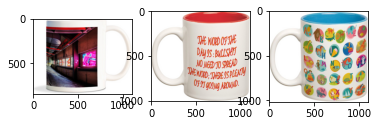

In [ ]:
import cv2
for name in data4['cat_lvl_1'].value_counts().index :
    print(name)
    print("-------")
    for i in range(3):
        plt.subplot(130 + 1 + i)
        filename = path + list_fct(name)[i+10]
        image = imread(filename)
        plt.imshow(image)
    plt.show()

In [ ]:
type(data4['image_path'][0])

str

## Transformation et affichage ORB sur une seule image

In [ ]:
len(list_photos)

1050

In [ ]:
list_photos[3]

'6329ddb46087cb8c09ced95471dd9643.jpg'

In [ ]:
data4['image_path'][37]

'e8ee7868b0c3d1d04b482cd4f3ec5ccc.jpg'

In [ ]:
import cv2
cv2.__version__

'4.5.1'

In [ ]:
filename=path+data4['image_path'][37]
test = cv2.imread(filename) # convert in gray
# Using cv2.imread() method
# Using 0 to read image in grayscale mode

In [ ]:
# Afficher la taille de la matrice de pixels
print("Taille de la matrice de pixels : {}".format(test.shape))

Taille de la matrice de pixels : (1100, 884, 3)


 pour une image numérique en noir et blanc : nous avons une matrice de taille hauteur × largeur où chaque élément contient un entier compris entre 0 et 255 afin d'indiquer le niveau de gris du pixel associé. 
l'intensité du pixel d'abscisse x et d'ordonnée y correspond à l'élément de la matrice situé à la y -ème ligne et x -ème colonne !
En largeur elle est divisée en 1860 pixels
En hauteur elle est divisée en 890 pixels 

In [ ]:
test.shape #taille dune image 

(1100, 884, 3)

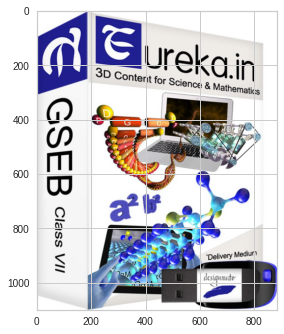

In [ ]:
#filename=path+data4['image_path'][i][5]
test = cv2.imread(path+data4['image_path'][37])#passage en gris avec 0
#image = cv2.cvtColor(image,cv2.COLOR_RGBA2GRAY)
#autre methodes  sinon on aurait une matrice de taille 3
plt.imshow(test)

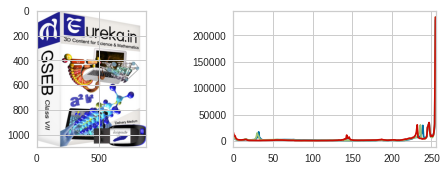

In [ ]:
# Calculate histogram without mask
plt.figure()
hist1 = cv2.calcHist([test],[0],None,[256],[0,256])
hist2 = cv2.calcHist([test],[1],None,[256],[0,256])
hist3 = cv2.calcHist([test],[2],None,[256],[0,256])

plt.subplot(221), plt.imshow(test)
plt.subplot(222), plt.plot(hist1), plt.plot(hist2),plt.plot(hist3)
plt.xlim([0,256])

plt.show()

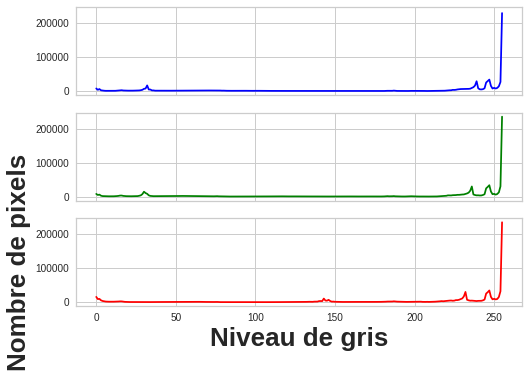

In [ ]:
fig,ax=plt.subplots(3,1,sharex=True,sharey=True)
ax[0].plot(hist1,color='blue')
ax[1].plot(hist2,color='green')
ax[2].plot(hist3,color='red')
plt.ylabel('Nombre de pixels',fontsize=26, fontweight = 'bold')
plt.xlabel('Niveau de gris',fontsize = 26, fontweight = 'bold')

#plt.title('Couleur rouge', fontsize = 30, fontweight = 'bold')
plt.show()

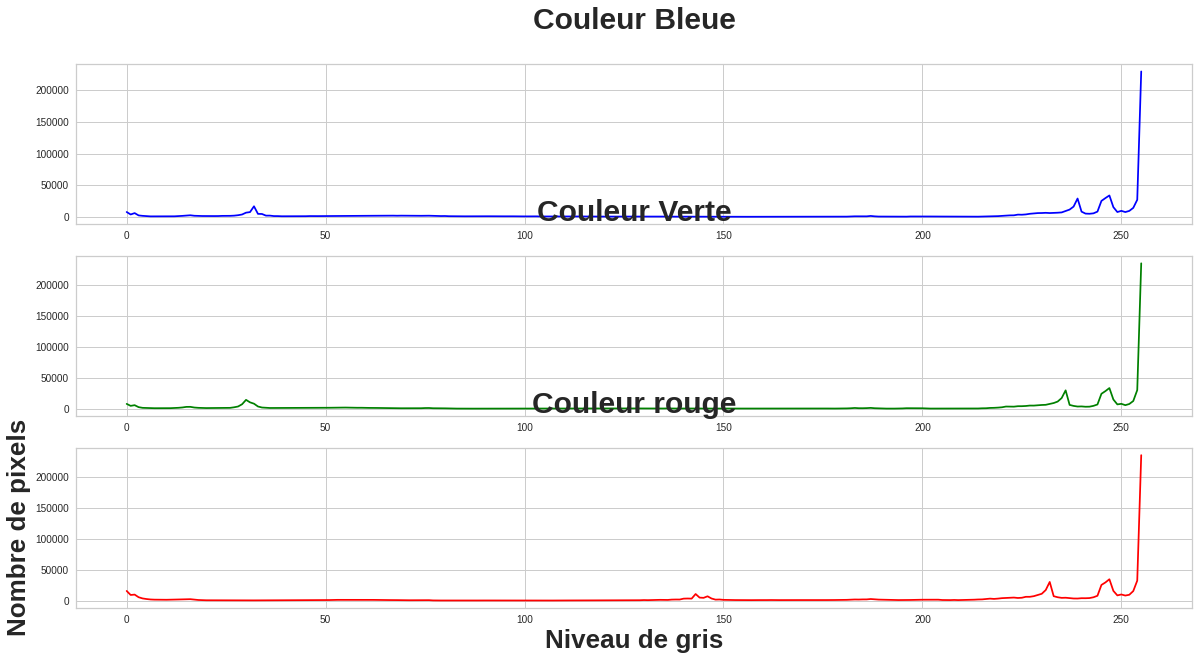

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(311)
plt.plot(hist1,color='blue')
plt.title('Couleur Bleue', fontsize = 30, pad = 35, fontweight = 'bold')
plt.subplot(312)
plt.plot(hist2,color='green')
#plt.ylabel('Nombre de pixels',fontsize = 26, fontweight = 'bold')
#plt.xlabel('Niveau de gris',fontsize = 26, fontweight = 'bold')
plt.title('Couleur Verte', fontsize = 30, pad = 35, fontweight = 'bold')
plt.subplot(313)
plt.plot(hist3,color='red')
plt.ylabel('Nombre de pixels',fontsize = 26, fontweight = 'bold')
plt.xlabel('Niveau de gris',fontsize = 26, fontweight = 'bold')
plt.title('Couleur rouge', fontsize = 30, pad = 35, fontweight = 'bold')
plt.show()


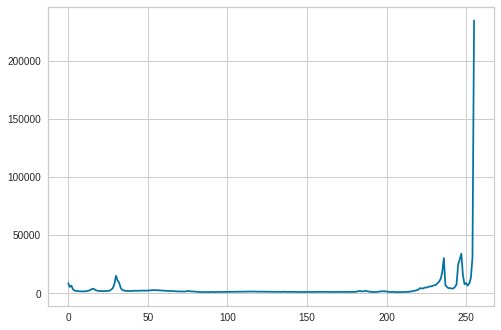

In [ ]:
plt.plot(hist2)

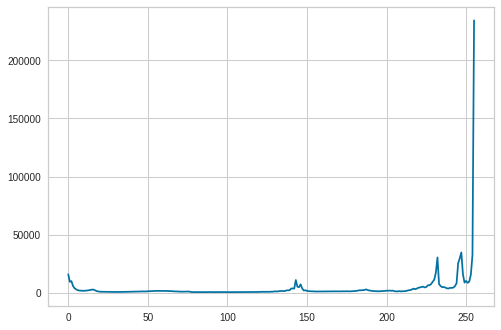

In [ ]:
plt.plot(hist3)

### Passage en gris

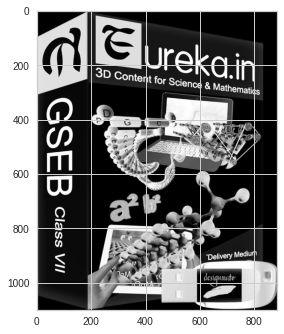

In [ ]:
from skimage import color
from skimage import io
filename=path+data4['image_path'][37]
img = io.imread(filename)
imgGray = color.rgb2gray(img)
plt.imshow(imgGray)


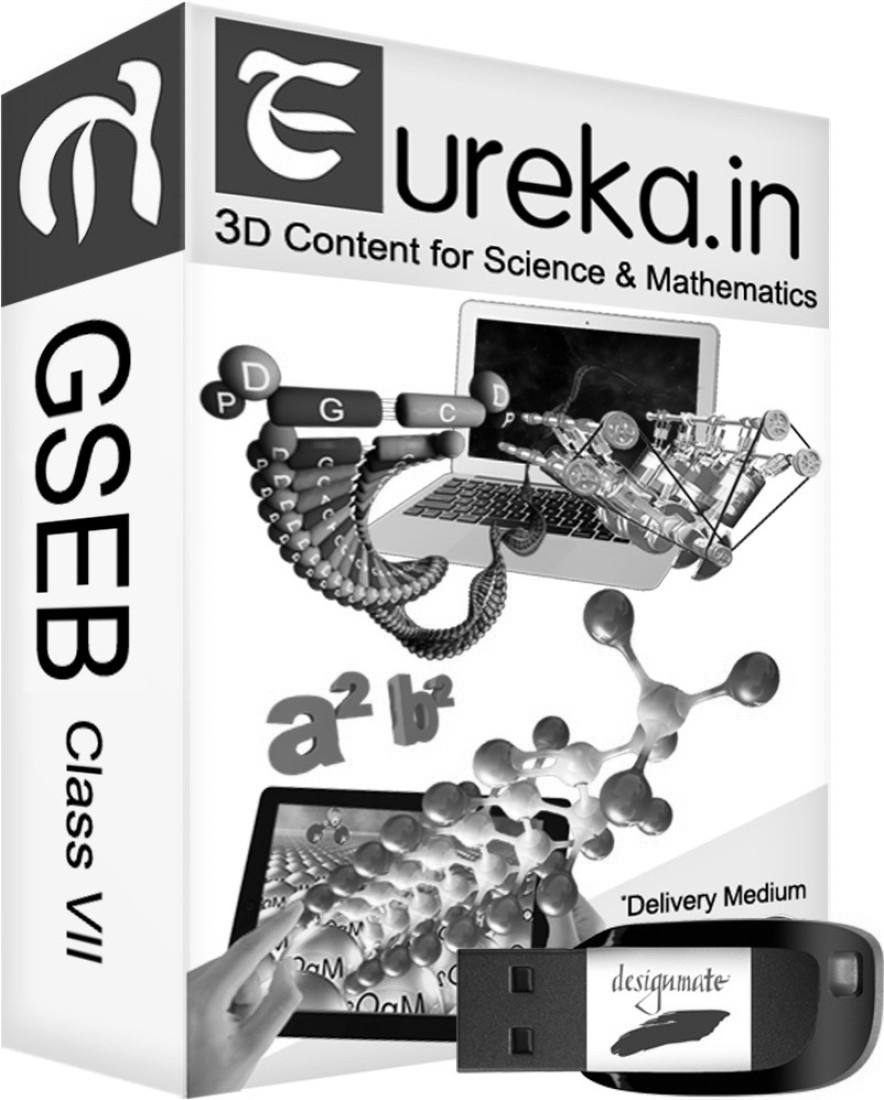

In [ ]:
from PIL import Image

img = Image.open(filename)
imgGray1 = img.convert('L')
imgGray1

No handles with labels found to put in legend.


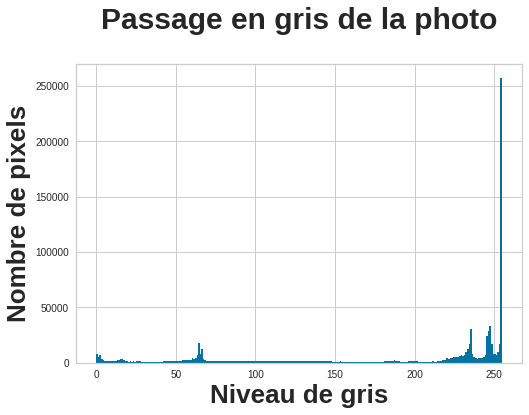

In [ ]:
img = np.array(imgGray1)
n, bins, patches = plt.hist(img.flatten(), bins=range(256))
plt.ylabel('Nombre de pixels',fontsize = 26, fontweight = 'bold')
plt.xlabel('Niveau de gris',fontsize = 26, fontweight = 'bold')
plt.title('Passage en gris de la photo', fontsize = 30, pad = 35, fontweight = 'bold')
plt.legend()
plt.show()

In [ ]:
#import cv2

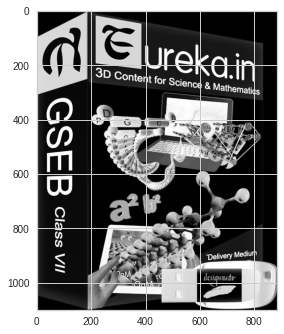

In [ ]:
filename=path+data4['image_path'][37]
image= cv2.imread(filename,0)#passage en gris avec 0
#image= cv2.cvtColor(image,cv2.COLOR_BGRA2GRAY)
#autre methodes  sinon on aurait une matrice de taille 3
plt.imshow(image)

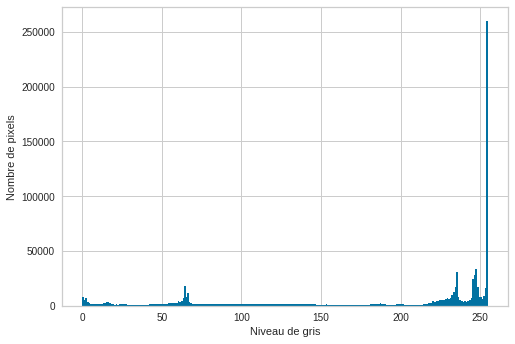

In [ ]:
n, bins, patches = plt.hist(image.flatten(), bins=range(256))
plt.ylabel('Nombre de pixels')
plt.xlabel('Niveau de gris')
plt.show()

### Filtrer le bruit en utilisant un filtrage moyen

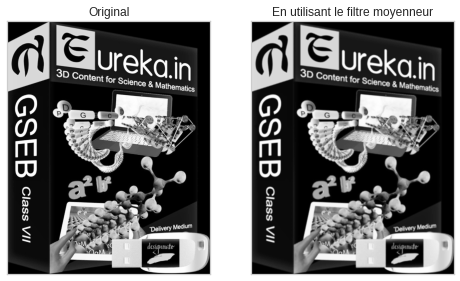

In [ ]:
#conversion en tableau array
kernel=np.ones((5,5),np.float32)/25
test = cv2.imread(path+data4['image_path'][37],0) # convert in gray
dst = cv2.filter2D(test,-1,kernel)#filtrage moyenne 
plt.subplot(121),plt.imshow(test),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('En utilisant le filtre moyenneur')
plt.xticks([]), plt.yticks([])
plt.show()


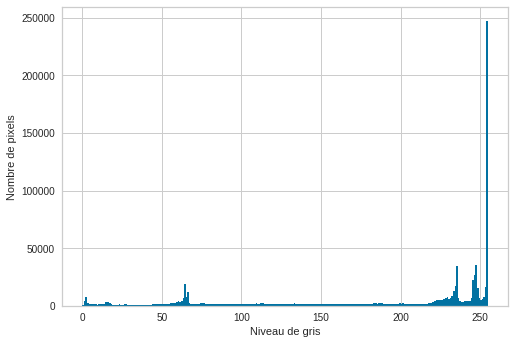

In [ ]:
n, bins, patches = plt.hist(dst.flatten(), bins=range(256))
plt.ylabel('Nombre de pixels')
plt.xlabel('Niveau de gris')
plt.show()

In [ ]:
test.shape,dst.shape

((1100, 884), (1100, 884))

### Egalisation histogramme (amélioration du contraste)

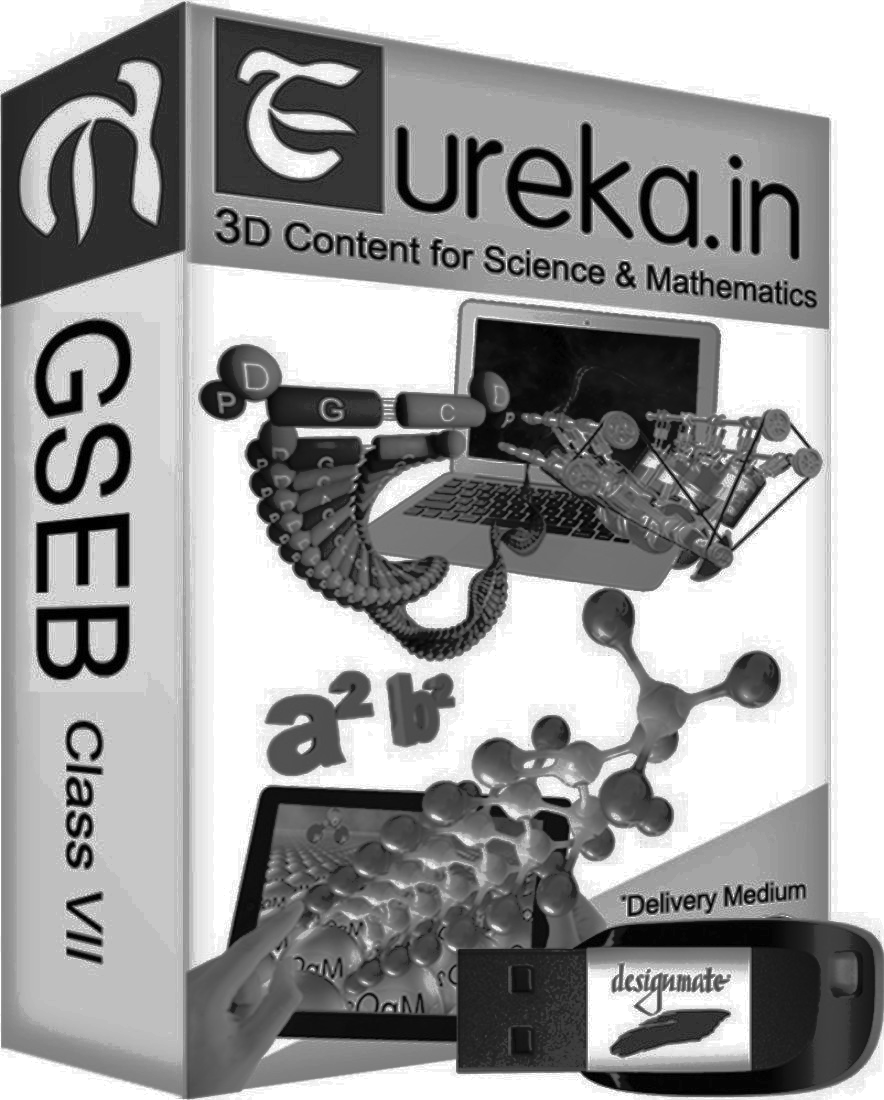

In [ ]:
#egalisation histogramme pour l'amelioration du contraste 
from PIL import ImageOps
imgegal=ImageOps.equalize(imgGray1)
imgegal

No handles with labels found to put in legend.


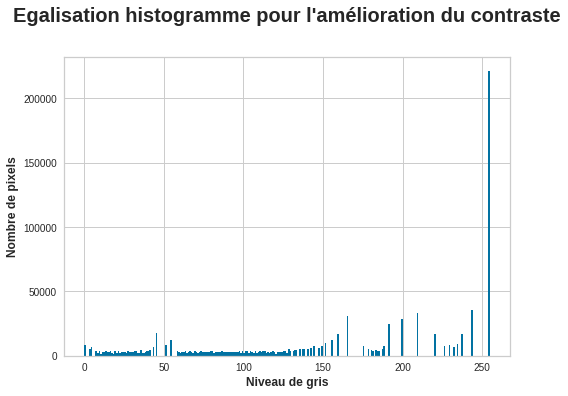

In [ ]:
t = np.array(imgegal)
n, bins, patches = plt.hist(t.flatten(), bins=range(256))
plt.ylabel('Nombre de pixels',fontsize = 12, fontweight = 'bold')
plt.xlabel('Niveau de gris',fontsize = 12, fontweight = 'bold')
plt.title('Egalisation histogramme pour l\'amélioration du contraste', fontsize = 20, pad = 35, fontweight = 'bold')
plt.legend()
plt.show()


In [ ]:
image_egalise = cv2.equalizeHist(dst)

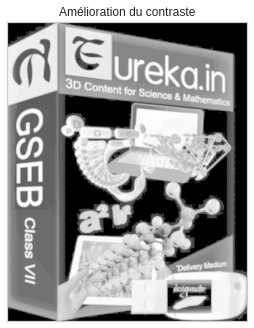

In [ ]:
#plt.subplot(131),plt.imshow(test),plt.title('Original')
#plt.xticks([]), plt.yticks([])
#plt.subplot(132),plt.imshow(dst),plt.title('En utilisant le filtre moyenneur')
#plt.xticks([]), plt.yticks([])
#plt.subplot(133),
plt.imshow(image_egalise),plt.title('Amélioration du contraste')
plt.xticks([]), plt.yticks([])
plt.show()

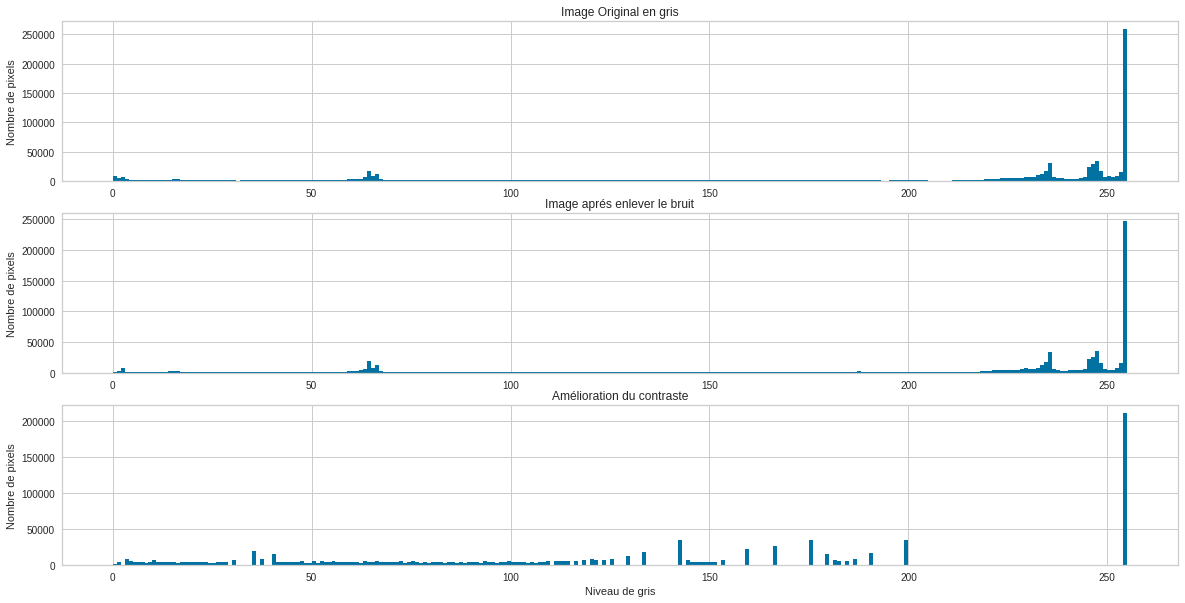

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(311)
n, bins, patches = plt.hist(test.flatten(), bins=range(256))
plt.ylabel('Nombre de pixels')
#plt.xlabel('Niveau de gris')
plt.title('Image Original en gris')
plt.subplot(312)
n, bins, patches = plt.hist(dst.flatten(), bins=range(256))
plt.ylabel('Nombre de pixels')
#plt.xlabel('Niveau de gris')
plt.title('Image aprés enlever le bruit')
plt.subplot(313)
n, bins, patches = plt.hist(image_egalise.flatten(), bins=range(256))
plt.ylabel('Nombre de pixels')
plt.xlabel('Niveau de gris')
plt.title('Amélioration du contraste')
plt.show()

In [ ]:
cv2.__version__

'4.5.1'

### Transformation et ORB

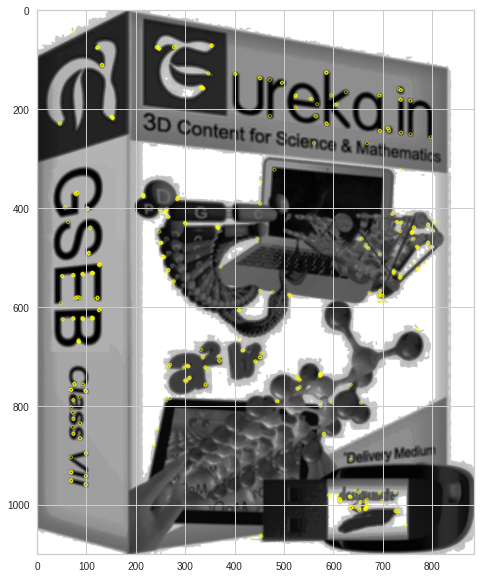

Descripteurs :  (500, 32)

[[146 148  36 ...  12 113 187]
 [110  50 240 ... 134 198  87]
 [ 94 168 158 ...  85 143  74]
 ...
 [222 205  20 ...  62  61  11]
 [186 105  46 ...  56 116 138]
 [138  82 243 ... 128  37 253]]


In [ ]:
import cv2
from PIL import Image
sift = cv2.ORB_create()
#sift=cv2.SIFT_create()
image = cv2.imread(path+data4['image_path'][37],0) 
# transformation en tableau d'array
#et passage en gris 
#image=Image.open(path+data4['image_path'][i][946])
kernel=np.ones((5,5),np.float32)/25
dst = cv2.filter2D(image,-1,kernel) #filtrage par moyenne
image1 = cv2.equalizeHist(dst)   # equalize image histogram
kp, des = sift.detectAndCompute(image1, None)
img=cv2.drawKeypoints(image1,kp,image1,color=(255, 255, 0))
plt.figure(figsize=(20,10))
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

Nous avons 500 descripteurs et chaque descripteur est un vecteur de longeur 32.
Les features sont des zones d'intéret d'une image des zones intéressantes qui peuvent correspondre a des contours des bords. a chaque feature détectée est associée à un vecteur appelé descripteur 

## Transformation et ORB sur toutes les images 

* Pour chaque image suppression du bruit  et egalisation
* création d'une liste de descripteurs par image ("sift_keypoints_by_img") qui sera utilisée pour réaliser les histogrammes par image
* création d'une liste de descripteurs pour l'ensemble des images ("sift_keypoints_all") qui sera utilisé pour créer les clusters de descripteurs

In [ ]:
path

'/content/drive/MyDrive/Colab Notebooks/P6 Classifiez des biens /Images/'

In [ ]:
import time, cv2
sift_keypoints = []
temps1=time.time()
sift = cv2.ORB_create()
for image_num in range(len(list_photos)) :
    #if image_num%100 == 0 : print(image_num)
    image = cv2.imread(path+list_photos[image_num],0) # convert in gray
    # image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    kernel=np.ones((5,5),np.float32)/25
    dst = cv2.filter2D(image,-1,kernel) #filtrage par moyenn
    
    res = cv2.equalizeHist(dst)   # equalize image histogram
    kp, des = sift.detectAndCompute(res, None)
    sift_keypoints.append(des)

sift_keypoints_by_img = np.asarray(sift_keypoints)
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")


Nombre de descripteurs :  (515880, 32)
temps de traitement SIFT descriptor :           555.60 secondes


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



In [ ]:
sift_keypoints_all.shape

(515880, 32)

Nous avons en tout 515855 descripteurs avec une longeur 32

## Création des clusters de descripteurs
Pour le nombre de clusters on a deux méthodes 
Nombre de cluster = racine carré (nombre de descripteurs)
ou
Nombre de cluster= le nombre de catégorie qu'on veut trouver *10.
Nous allons regrouper les descripteurs qui se ressemblent le plus on appelle bag of features 

In [ ]:
from sklearn import cluster, metrics

# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(sift_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(sift_keypoints_all)
#init_size c'est le nombre d'échantillon à échantilloner aléatoirement
#pour accélérer l'initialisation
#random_state generaration de l'aleatoire 

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  718
Création de 718 clusters de descripteurs ...
temps de traitement kmeans :            65.86 secondes


## Création des bag of Images 
 Pour chaque image : 
   - prédiction des numéros de cluster de chaque descripteur
   - création d'un histogramme = comptage pour chaque numéro de cluster du nombre de descripteurs de l'image

Nous avons 718 clusters pour chaque image on va compter le nombre
de regroupement de descripteur chaque cluster de descripteur est l'équivalent d'un mot on va prendre chaque image et on regarde s'il ya ce regroupement de descripteur
Ces clusters deront nos features  

In [ ]:
sift_keypoints_by_img.shape #contient les descripteurs de chaque image 

(1050,)

In [ ]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)#prédiction des clusters pour les descripteurs 
    #res numero cluster pour la liste de descripteur
    #pour chaque descripteur il va me donner le nbre de cluster 
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des #on fait +1 si on trouve un descripteur dans le cluster
    return hist


# Creation of a matrix of histograms
hist_vectors=[]
#on parcourt tous les descripteurs de chaque image 
for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")


0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :            20.89 secondes


In [ ]:
len(hist_vectors)

1050

In [ ]:
im_features.shape #nous avons 1050 lignes images et 718 colonnes 
#qui représentent nos bag of visuals 

(1050, 718)

In [ ]:
im_features.max(),im_features.min(),im_features.std(),np.median(im_features),im_features.mean()

(0.21000000000000016, 0.0, 0.00301082499427009, 0.0, 0.001392757660167131)

## Réduction dimension ACP

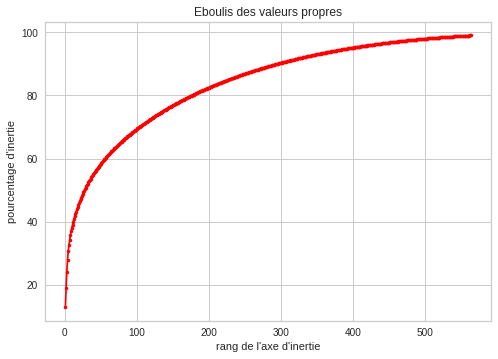

In [ ]:

from sklearn import decomposition
n_comp=0.99#nombre de composantes maximum a calculer pour l'acp
pca=decomposition.PCA(n_components=n_comp)
pca.fit(im_features)

display_scree_plot(pca)

In [ ]:
pca.explained_variance_ratio_.cumsum()
#pour les deux dimensions on est 0.19 de variance espliquée ce qui est
#vraiment bas 

array([0.12971518, 0.18997287, 0.24019501, 0.2789405 , 0.30661393,
       0.32650513, 0.3426564 , 0.35800526, 0.36988958, 0.38103452,
       0.39125807, 0.40095769, 0.4095838 , 0.4177186 , 0.42519808,
       0.43244369, 0.43957092, 0.44620475, 0.45261953, 0.45898986,
       0.46513147, 0.47111778, 0.47688948, 0.48258553, 0.48804406,
       0.49322086, 0.49812222, 0.50295243, 0.50759446, 0.51213965,
       0.51657314, 0.52086254, 0.52508885, 0.52914275, 0.53305093,
       0.53692793, 0.54074188, 0.54451408, 0.54814689, 0.55170946,
       0.55518787, 0.55856096, 0.56187271, 0.56515172, 0.56837141,
       0.57151543, 0.57462678, 0.57763745, 0.58062429, 0.58355814,
       0.58643605, 0.58927449, 0.59209263, 0.59487893, 0.59761562,
       0.6003055 , 0.60295974, 0.60559895, 0.60820941, 0.61080029,
       0.61334338, 0.61583189, 0.61830324, 0.62073858, 0.62315321,
       0.62552878, 0.62787715, 0.63020285, 0.63250152, 0.63477254,
       0.63702144, 0.63924811, 0.64144865, 0.64361513, 0.64574

 La réduction PCA permet de créer des features décorrélées entre elles, et de diminuer leur dimension,on passe de 718 à 564 en gardant 99% de l'information tout en gardant un niveau de variance expliquée élevé (99%)
* L'impact est une meilleure séparation des données via le T-SNE et une réduction du temps de traitement du T-SNE

In [ ]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)#projection
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 718)
Dimensions dataset après réduction PCA :  (1050, 564)


In [ ]:
data4.columns

Index(['image_path', 'cat_lvl_1', 'label'], dtype='object')

In [ ]:
data4['cat_lvl_1'].shape

(1050,)

## TSNE pour la visualisation 

In [ ]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=5, init='random')
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = data4["cat_lvl_1"]
print(df_tsne.shape)


(1050, 3)


In [ ]:
df_tsne.head()

tsne1      tsne2             class
0  13.387074 -25.494837  Kitchen & Dining
1   5.133729 -56.915585         Computers
2  31.442978  39.341232  Kitchen & Dining
3  53.608360 -32.555244         Computers
4  53.306446 -32.472931         Computers

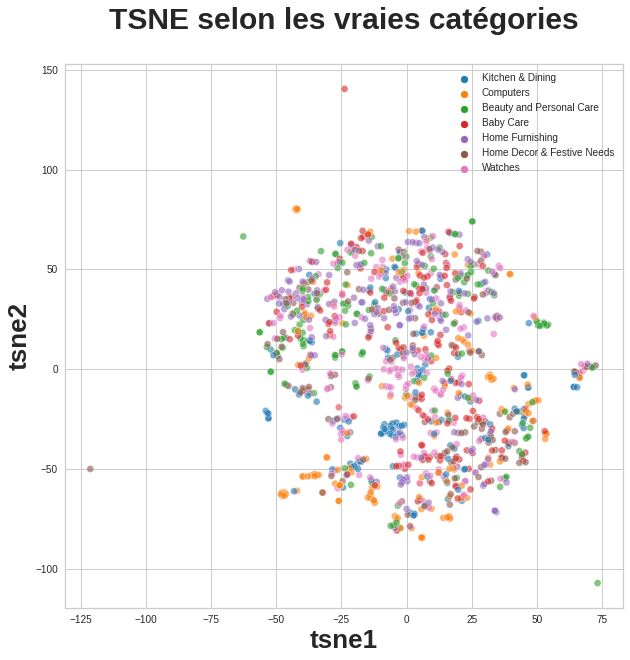

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon les vraies catégories', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend() 
#plt.legend(prop={'size': 14})
plt.show()

D'aprés l'analyse visuelle on voit qu'il ya aucun groupe de catégories de produits qui se distinguent on a un petit groupe de kitchen dining
On va essayer de conforter cette analyse visuelle par une mesure de similarite de deux labels le rand index nous allons creer 7 clusters (7 labels) pour notre TSNE puis nous allons les comparer avec les labels de nos categories 

## Création des clusters pour la TSNE 

In [ ]:
df_tsne.columns

Index(['tsne1', 'tsne2', 'class'], dtype='object')

In [ ]:
df_tsne['class'].head()

0    Kitchen & Dining
1           Computers
2    Kitchen & Dining
3           Computers
4           Computers
Name: class, dtype: object

In [ ]:
X_tsne.shape

(1050, 2)

In [ ]:
X_tsne

array([[ 13.387074 , -25.494837 ],
       [  5.1337295, -56.915585 ],
       [ 31.442978 ,  39.341232 ],
       ...,
       [-39.779346 ,  40.39333  ],
       [  3.043244 , -72.55696  ],
       [  2.6724646, -73.36821  ]], dtype=float32)

In [ ]:
from sklearn import cluster, metrics
#on va prendre la sortie du TSNE 
cls = cluster.KMeans(n_clusters=7)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

(1050, 4)


In [ ]:
df_tsne.columns

Index(['tsne1', 'tsne2', 'class', 'cluster'], dtype='object')

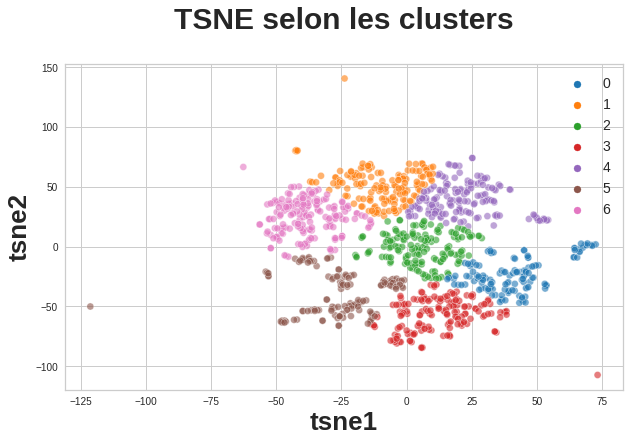

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

## Comparaison métrique avec les labels des catégories de produits similarité

In [ ]:
data4.columns

Index(['image_path', 'cat_lvl_1', 'label'], dtype='object')

In [ ]:
data4.shape

(1050, 3)

In [ ]:
data4[['label','cat_lvl_1']]

label                 cat_lvl_1
0         5          Kitchen & Dining
1         2                 Computers
2         5          Kitchen & Dining
3         2                 Computers
4         2                 Computers
...     ...                       ...
1045      5          Kitchen & Dining
1046      2                 Computers
1047      1  Beauty and Personal Care
1048      5          Kitchen & Dining
1049      5          Kitchen & Dining

[1050 rows x 2 columns]

In [ ]:
df_tsne.shape

(1050, 4)

In [ ]:
from sklearn.metrics import precision_score,accuracy_score,recall_score,confusion_matrix
labels = data4["label"]#vraie valeurs 
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))
#permet de comparer entre les clusters du TSNE et les labels 
#de la catégorie de produit
#la correspondance entre nos clusters et le nombre de catégories n'est pas
#vraiment réelle 


ARI :  0.03596573960262438


Nous avons une mesure de similarité trés loin de 1 qui est tres faible 

### Autres types de mesures (matrice de confusion)


In [ ]:
df_tsne.columns

Index(['tsne1', 'tsne2', 'class', 'cluster'], dtype='object')

In [ ]:
df_tsne['class'].value_counts()

Computers                     150
Watches                       150
Kitchen & Dining              150
Home Decor & Festive Needs    150
Beauty and Personal Care      150
Home Furnishing               150
Baby Care                     150
Name: class, dtype: int64

In [ ]:
df_tsne.groupby('cluster').count()['class']
#ce qui montre que nos clusters nous donnent des mauvaises repartitions
#en sachant que que les classes de categories etait quasi equilibree avec 150
#on va calculer la matrice de confusion en prenant comme les vraies valeurs class
#et la prediction cluster 

cluster
0    132
1    152
2    154
3    162
4    150
5    129
6    171
Name: class, dtype: int64

In [ ]:
cls.labels_

array([2, 3, 4, ..., 6, 3, 3], dtype=int32)

In [ ]:
data4['cat_lvl_1'].value_counts().index

Index(['Computers', 'Watches', 'Kitchen & Dining',
       'Home Decor & Festive Needs', 'Beauty and Personal Care',
       'Home Furnishing', 'Baby Care'],
      dtype='object')

In [ ]:
labels.unique()

array([5, 2, 1, 0, 4, 3, 6])

In [ ]:
cls.labels_

array([2, 3, 4, ..., 6, 3, 3], dtype=int32)

In [ ]:
accuracy_score(labels,cls.labels_)

0.17523809523809525

In [ ]:
conf_mat = metrics.confusion_matrix(labels, cls.labels_)
#labels vraie valeurs
#cls.labels_ les cluster du tsne
l=cls.labels_
g=data4['cat_lvl_1'].value_counts().index
print(conf_mat)



[[19 24 27 28 26  3 23]
 [13 27 15 11 35  5 44]
 [25 17 18 35  9 35 11]
 [41 15 21 18 15 14 26]
 [ 5 38  9 24 33  5 36]
 [22 12 24 22 12 48 10]
 [ 7 19 40 24 20 19 21]]


In [ ]:
corresp = np.argmax(conf_mat,axis=0)
corresp

array([3, 4, 6, 2, 1, 5, 1])

In [ ]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    #corresp = np.argmax(conf_mat,axis=0) vu quon a un numero de colonne de
    #la valeur max les meme pour deux lignes on le fait manuellement
    #on na pas des accuracy proche de 1 on pouvait utiliser le argmax
    corresp = [0, 3, 6, 4, 2, 1, 5]
    print ("Correspondance des clusters : ", corresp)
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

cls_labels_transform = conf_mat_transform(labels, cls.labels_)
conf_mat = metrics.confusion_matrix(labels, cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(labels, cls_labels_transform))
#accuracy =precision la plus part sont prédits positifs et le sont effectivement
#recall=sensibilte taux de vrais positifs 
#specifite =taux de varais negatifs 

Correspondance des clusters :  [0, 3, 6, 4, 2, 1, 5]
[[19  3 26 24 28 23 27]
 [13  5 35 27 11 44 15]
 [25 35  9 17 35 11 18]
 [41 14 15 15 18 26 21]
 [ 5  5 33 38 24 36  9]
 [22 48 12 12 22 10 24]
 [ 7 19 20 19 24 21 40]]

              precision    recall  f1-score   support

           0       0.14      0.13      0.13       150
           1       0.04      0.03      0.04       150
           2       0.06      0.06      0.06       150
           3       0.10      0.10      0.10       150
           4       0.15      0.16      0.15       150
           5       0.06      0.07      0.06       150
           6       0.26      0.27      0.26       150

    accuracy                           0.12      1050
   macro avg       0.12      0.12      0.12      1050
weighted avg       0.12      0.12      0.12      1050



In [ ]:
columns = [i for i in df_tsne['cluster'].value_counts().index]
print(columns)

[6, 3, 2, 1, 4, 0, 5]


In [ ]:
df_tsne.columns

Index(['tsne1', 'tsne2', 'class', 'cluster'], dtype='object')

In [ ]:
 index=[label for label in df_tsne['class'].value_counts().index]
 print(index)

['Computers', 'Watches', 'Kitchen & Dining', 'Home Decor & Festive Needs', 'Beauty and Personal Care', 'Home Furnishing', 'Baby Care']


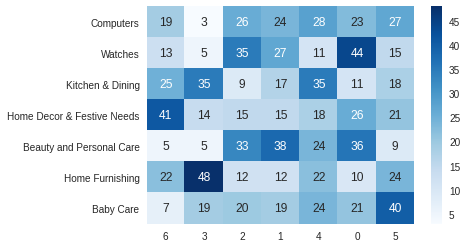

In [ ]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in df_tsne['class'].value_counts().index],
                  columns = [i for i in df_tsne['cluster'].value_counts().index])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")

In [ ]:
df_cm

6   3   2   1   4   0   5
Computers                   19   3  26  24  28  23  27
Watches                     13   5  35  27  11  44  15
Kitchen & Dining            25  35   9  17  35  11  18
Home Decor & Festive Needs  41  14  15  15  18  26  21
Beauty and Personal Care     5   5  33  38  24  36   9
Home Furnishing             22  48  12  12  22  10  24
Baby Care                    7  19  20  19  24  21  40

En conclusion la methode ORB donne des mauvais resultats pour la classification dimages nous pouvons utiliser d'autres techniques plus puissant comme le CNN transfert learning du deep learning.
On a du mal à distinguer d'autres classes ce qui nous pousse à réfléchir sur d'autres techniques. Comme le transfert learning

In [ ]:
im_features.shape,databow2.shape

((1050, 718), (1050, 1364))

In [ ]:
im_features

array([[0.   , 0.004, 0.   , ..., 0.01 , 0.   , 0.002],
       [0.   , 0.   , 0.   , ..., 0.002, 0.   , 0.   ],
       [0.008, 0.   , 0.004, ..., 0.014, 0.   , 0.   ],
       ...,
       [0.002, 0.002, 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.004, ..., 0.   , 0.   , 0.002],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ]])

In [ ]:
databow2.values

array([[0., 0., 0., ..., 0., 0., 2.],
       [0., 0., 0., ..., 0., 0., 2.],
       [0., 0., 0., ..., 0., 0., 2.],
       ...,
       [0., 0., 0., ..., 0., 0., 2.],
       [0., 0., 0., ..., 0., 0., 2.],
       [0., 0., 0., ..., 0., 0., 2.]])

# Regroupement features texte et images 

On va prendre les features avec le BOW Tf Idf 

In [ ]:
assemb=np.concatenate((im_features,databow2.values),axis=1)

In [ ]:
assemb.shape

(1050, 2082)

## Réduction dimension

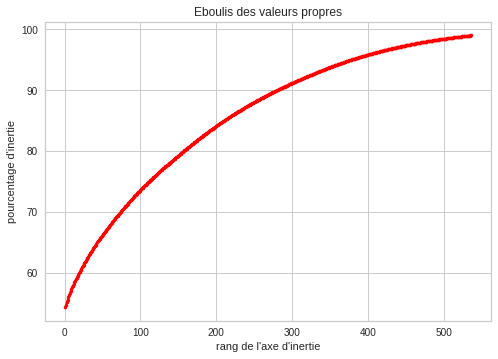

In [ ]:
from sklearn import decomposition
n_comp=0.99#nombre de composantes maximum a calculer pour l'acp
pca=decomposition.PCA(n_components=n_comp)
pca.fit(assemb)
#nous luis donnons les données centrés et réduites  
#nous lui donnons les données quantitatives en vue quil calcul les composantes
#graphique eboulis des valeurs propres
#pour la representation de nos individus 
display_scree_plot(pca)

In [ ]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", assemb.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(assemb)#projection
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 2082)
Dimensions dataset après réduction PCA :  (1050, 536)


## TSNE pour la visualisation 

In [ ]:
feat_pca.shape #avec 536 on garde 99% de variance expliquée

(1050, 536)

In [ ]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=5, init='random')
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = data4["cat_lvl_1"]
print(df_tsne.shape)

(1050, 3)


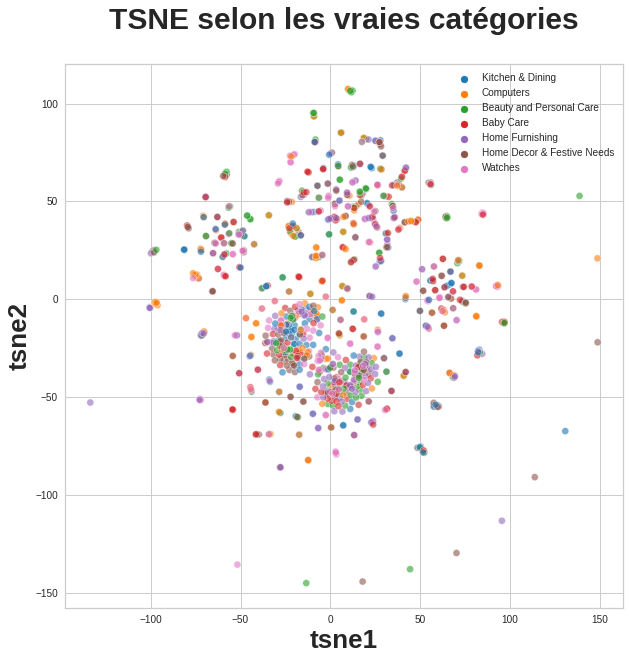

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon les vraies catégories', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend() 
#plt.legend(prop={'size': 14})
plt.show()

# Réseaux de neurones (Transfert Learning)

In [ ]:
! pip install tensorflow
#installation de tensorflow pour la manipulation
#des reseaux de neurones 
#c'est une API qui regroupe plusieurs modéles 
#https://keras.io/api/applications
#https://github.com/formasys/classification_pneumonia/blob/master/pneumonia_1.ipynb
#https://fr.wikipedia.org/wiki/ImageNet
#https://www.youtube.com/watch?v=jRaPzSR98uk&list=WL&index=59&t=826s

In [ ]:
#importer les packages 
import os #pour le chemin des fichiers 
import zipfile
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from glob import glob #extraire le nombre de fichiers
from tqdm import tqdm_notebook
from keras.preprocessing.image import ImageDataGenerator
#pour generer des images en faisant des transformations geometriques
from keras.layers import Input, Lambda, Dense, Flatten
#pour jaouter des couches 
from keras.models import load_model, Model
#pour importer des modeles 
from keras.applications.vgg16 import VGG16 #on va utiliser le modele vgg16
from keras.applications.vgg16 import preprocess_input

%matplotlib inline
tf.__version__

'2.5.0'

In [ ]:
#importer la base de données 
#data_path='/content/drive/MyDrive/Colab Notebooks/P6 Classifiez des biens /IMAGE_2'

In [ ]:
#train_dir = os.path.join(data_path, "train")
#test_dir = os.path.join(data_path, "test")

In [ ]:
train='/content/drive/MyDrive/Colab Notebooks/P6 Classifiez des biens /TRAIN'
#pour que ca marche faut que notre dossier contient des arborescences 
#par exemple dossier train contient train1 et train 2

In [ ]:
test='/content/drive/MyDrive/Colab Notebooks/P6 Classifiez des biens /TEST'

In [ ]:
list_train = [file for file in listdir(train)]
print(len(list_train))

7


In [ ]:
list_test = [file for file in listdir(test)]
print(len(list_test))

7


In [ ]:
#creation reseaux de neurones de mon modele de base
#taille de nos images 
IMG_SHAPE = (224, 224,3)
base_model = VGG16(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')
#https://keras.io/api/applications/vgg/#vgg16-function
#input_shape=données d'entree
#include_top est ce que je veux rajouter quelque chose a la sortie rajouter dautres 
#couches

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
#presentation de mon structure
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
#nous avons une sortie (7,7,12) nous ce quon veut c'est savoir si nos 
#images correspondent a nos 7 categories 
#bloquer le modele de base
#est ce que il est entrainable on met false
base_model.trainable = False

In [ ]:
#verification de la taille de la sortie 
base_model.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [ ]:
#ajouter les couches de sorties 
#data4.columns

In [ ]:
#folders=(data4['cat_lvl_1'].value_counts().index)

In [ ]:
#len(folders)

7

In [ ]:
#ajouter les couches de sorties
# our layers - you can add more if you want
x = Flatten()(base_model.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(7, activation='softmax')(x)

In [ ]:
#creation modele qui englobe tout 
model = Model(inputs=base_model.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
#compilation de notre modele
#loss pour la fonction de perte 
#pour l'optimisation adam
#pour les fonctions de metrics on prend l'accuracy
model.compile(loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

In [ ]:
#creer les photos augmentées
#rescale pour normaliser
#shear_range pou tourner les photos
#shear range tourner les photos
#zoom range pour zoomer
#horizontal les tourner de facon horizontale
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)




In [ ]:
training_set = train_datagen.flow_from_directory(train,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 840 images belonging to 7 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 210 images belonging to 7 classes.


In [ ]:
#appliquer le modele 
model.fit(training_set, epochs=5, validation_data=test_set)

Epoch 1/5
12/27 [============>.................] - ETA: 2:00 - loss: 1.6050 - accuracy: 0.7361

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


27/27 [==============================] - 375s 12s/step - loss: 1.4709 - accuracy: 0.7776 - val_loss: 2.5127 - val_accuracy: 0.5524
Epoch 2/5
27/27 [==============================] - 39s 1s/step - loss: 0.4859 - accuracy: 0.8890 - val_loss: 2.6642 - val_accuracy: 0.5571
Epoch 3/5
27/27 [==============================] - 39s 1s/step - loss: 0.2422 - accuracy: 0.9315 - val_loss: 2.4101 - val_accuracy: 0.5238
Epoch 4/5
27/27 [==============================] - 38s 1s/step - loss: 0.2630 - accuracy: 0.9155 - val_loss: 2.9979 - val_accuracy: 0.5238
Epoch 5/5
27/27 [==============================] - 38s 1s/step - loss: 0.2199 - accuracy: 0.9231 - val_loss: 3.4409 - val_accuracy: 0.5524


In [ ]:
#metrique
valid_loss, valid_accuracy = model.evaluate_generator(test_set)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [ ]:
valid_accuracy

0.5523809790611267

In [ ]:
print("Accuracy after transfer learning: {}".format(valid_accuracy))

Accuracy after transfer learning: 0.5523809790611267


In [ ]:
#### A refaire######
#faut prendre la derniere couche pour faire le feature enginering
#comme l'histogramme dans le bag of images 
#enlever la derniere couche du modéle et sans entrainement faire 
#unn predict pour chaque image afin de créer des features
#réaliser ensuite la démarche de reduction de dimension et TSNE
#https://www.youtube.com/watch?v=JL4LKU-O4wg
#youtube a taper =cnn feature extraction and classification python

def evaluate(model, data_generator, num_steps=100):
    results = np.array([])
    labels = np.array([])

    for step in range(1, num_steps+1):
        images, batch_labels = data_generator.next()

        if (step % 10 == 0):
            print('Batch {}'.format(step))

        batch_results = model.predict(images)

        if len(results) == 0:
            results = batch_results
            labels = batch_labels
        else:
            results = np.concatenate((results, batch_results))
            labels = np.concatenate((labels, batch_labels))

    return results, labels

In [ ]:
results, labels = evaluate(model, training_set)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


Batch 10
Batch 20
Batch 30
Batch 40
Batch 50
Batch 60
Batch 70
Batch 80
Batch 90
Batch 100


In [ ]:
results.shape

(3128, 7)

In [ ]:
results

array([[1.0000343e-03, 9.9773139e-01, 1.9950172e-05, ..., 5.2189629e-04,
        3.7877823e-04, 3.6039859e-05],
       [6.2417060e-02, 8.5689580e-01, 4.1825497e-03, ..., 3.2506056e-02,
        3.1092616e-02, 2.2129051e-03],
       [1.1151723e-03, 9.8910272e-01, 5.5745448e-04, ..., 8.6041875e-03,
        2.6285279e-05, 4.1510284e-04],
       ...,
       [3.5837844e-03, 9.5476454e-01, 3.1693473e-02, ..., 1.0345305e-03,
        1.7556066e-04, 8.3295656e-03],
       [4.1758339e-03, 9.5362163e-01, 2.0940048e-03, ..., 3.8216155e-02,
        3.1727782e-04, 1.5274696e-03],
       [3.7353014e-04, 9.9726993e-01, 1.1822452e-03, ..., 2.9899314e-04,
        2.6658433e-06, 6.7115814e-04]], dtype=float32)

## TSNE

In [ ]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, init='random')
X_tsne = tsne.fit_transform(results)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = data4["cat_lvl_1"]
print(df_tsne.shape)

(3128, 3)


In [ ]:
df_tsne.isna().sum()

tsne1       0
tsne2       0
class    2078
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
imput=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df_tsne['class']=imput.fit_transform(df_tsne['class'].values.reshape(df_tsne.shape[0],1))

In [ ]:
df_tsne.isna().sum()

tsne1      0
tsne2      0
class      0
cluster    0
dtype: int64

In [ ]:
#on va regarder la stabilité de notre clustering
#en le comparant avec les catégories de produits
#avant de faire cela nous allons tranformer les modalités de la variable categorie
#en utilisant l'encodage 
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
resultats=encoder.fit_transform(df_tsne['class'])

In [ ]:
from sklearn import cluster, metrics
#on va prendre la sortie du TSNE 
cls = cluster.KMeans(n_clusters=7)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

(3128, 4)


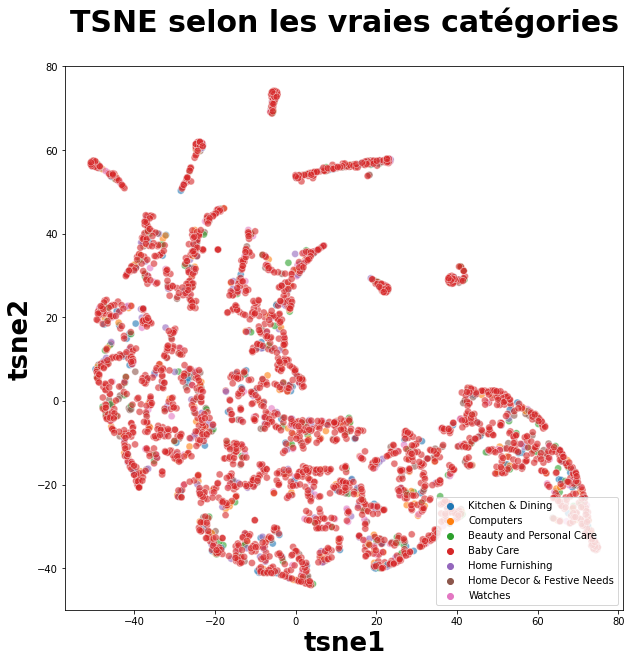

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon les vraies catégories', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(loc='lower right') 
#plt.legend(prop={'size': 14})
plt.show()

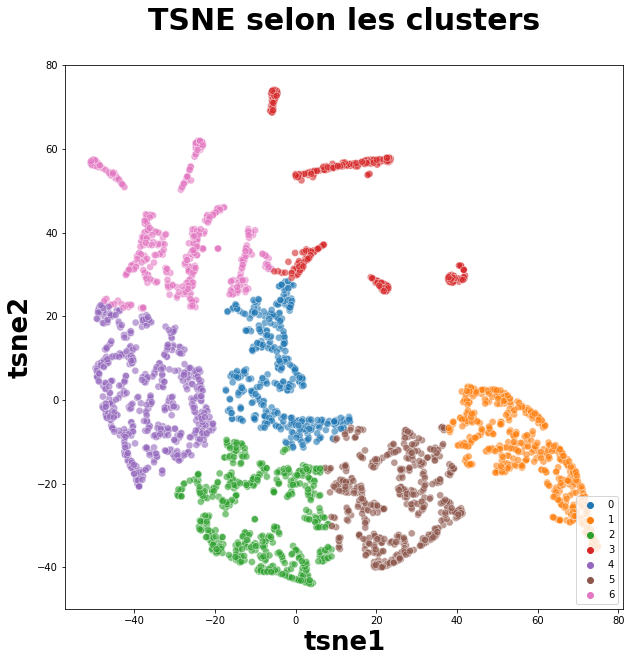

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="cluster", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(loc='lower right') 
#plt.legend(prop={'size': 14})
plt.show()

In [ ]:
from sklearn.metrics import precision_score,accuracy_score,recall_score,confusion_matrix

print("ARI : ", metrics.adjusted_rand_score(resultats, cls.labels_))

ARI :  -0.0002024278419728479
